<br>

# Twitter SampleCluster Analysis

# Social Network Analysis - Amber Heard Case - Twitter (Aquaman Petition)
MAHMOUD NAGY - JUNE 2022

## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>Twitter (Aquaman Petition) - Social Network Analysis on Amber Heard's Case 

**Year: 2020, Month: (11, 'nov'), File: tweets1.json**
> This Is a Sample of a cluster containing more than 1K "Aquaman Petition Links"
> 
> **NOTE:**
> - We will use a sample cluster in this analysis
> - Then, If we want to repeat the analysis on the other clusters,
>      - We Can Choose the required graphs, and save them to to the clustering results folder 

In [1]:
import pandas as pd
import os
import json 
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
import pickle
import re
import warnings
import datetime
warnings.filterwarnings('ignore')
sb.set_style("darkgrid")
%matplotlib inline

import plotly.io as pio
pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550


import helpers

# To Apply helpers updates without resarting the kernel
import importlib
importlib.reload(helpers)

from load_cluster_data import *

# # To keep track of any module updates
# %load_ext autoreload
# %autoreload2

%config InlineBackend.figure_format = 'retina'

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

> <ul>
 <li><a href="#tweet_metrics">Tweets Metrics</a></li>
 <li><a href="#user_tweets">Users Tweets Metrics</a></li>  
    <li>------------------------------</li>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peaks</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
 <li><a href="#user_metrics">Users Metrics</a></li> 
 </ul>

**Year: 2020, Month: (11, 'nov'), File: tweets1.json**
> This is a sample of a cluster containing more than 1K "Aquaman Petition Links"

## Tweets Data

In [2]:
print(tweets.shape)
tweets.head(1)

(5169, 30)


,text,n_followers,n_statuses,user_url,username,created_at,user_created_at,user_id,lang,profile_banner_url,user_description,profile_image_url,user_screen_name,user_location,n_friends,tweet_id,is_verified,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_retweets
0,"kate james, who in the past was employed by am...",15612,203796,https://t.co/0rDo6do7uU,Support Johnny Depp ♡ Stream City of Lies,2020-11-01 00:13:39,2015-12-23 23:22:52,4583281223,en,https://pbs.twimg.com/profile_banners/45832812...,♡ Depphead\n♡ @hollywoodvamps\n♡ @minamatafilm...,http://pbs.twimg.com/profile_images/1368268947...,MyGrindelwald,Flanders,273,1322693246594723841,False,2020-11-01,2020,Nov,1,0,1774 days 00:50:47,1774,00:50:47,12.0,1.0,68.0,0.0,12.0


In [3]:
tweets.created_at.dt.date.min(), tweets.created_at.dt.date.max()

(datetime.date(2020, 11, 1), datetime.date(2020, 11, 30))

In [4]:
tweets.user_created_at.dt.date.min(), tweets.user_created_at.dt.date.max()

(datetime.date(2007, 3, 7), datetime.date(2020, 11, 28))

In [5]:
tweets.lang.value_counts()

en    5169
Name: lang, dtype: int64

---

In [6]:
# Filter on Aquaman petition Links
print(aquaman_petition.shape)
aquaman_petition.head(1) 

(852, 30)


,text,n_followers,n_statuses,user_url,username,created_at,user_created_at,user_id,lang,profile_banner_url,user_description,profile_image_url,user_screen_name,user_location,n_friends,tweet_id,is_verified,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_retweets
683,dc entertainment: remove amber heard from aqua...,2408,80366,None,shalana barbour,2020-11-02 15:33:10,2009-11-07 10:15:40,88158868,en,https://pbs.twimg.com/profile_banners/88158868...,"love wrestling (WWE) bsb, john cena and watchi...",http://pbs.twimg.com/profile_images/1380093529...,bsbfan558,🇺🇸🏴‍☠️#JusticeForJohnnyDepp,4597,1323287041493274624,False,2020-11-02,2020,Nov,2,15,4013 days 05:17:30,4013,05:17:30,0.0,0.0,0.0,0.0,0.0


In [7]:
aquaman_petition.created_at.dt.date.min(), aquaman_petition.created_at.dt.date.max()

(datetime.date(2020, 11, 2), datetime.date(2020, 11, 30))

In [8]:
aquaman_petition.user_created_at.dt.date.min(), aquaman_petition.user_created_at.dt.date.max()

(datetime.date(2007, 3, 17), datetime.date(2020, 11, 10))

> **NOTE:**
> - (Cluster 1 - Nov 2020) Contains 852 Tweets with "Aquaman Petition Links" out of 5169 total Tweets

---

## Users Data

> **NOTE:**
> - All Users Data Exists in The Tweets Data

In [9]:
print(users.shape)
users.head(2)

(1643, 11)


,Unnamed: 0,user.id_str,user.screen_name,user.name,user.created_at,user.location,user.followers_count,user.friends_count,user.statuses_count,profile_image_url,profile_banner_url
780,117811,817645,WeSmirch,WeSmirch,2007-03-07 10:13:40,United States,2805,4,119833,http://pbs.twimg.com/profile_images/26169952/w...,NaN
107,16049,821193,slashfilm,Peter Sciretta,2007-03-08 07:27:32,"West Hollywood, CA",188620,1057,135089,http://pbs.twimg.com/profile_images/1195501893...,https://pbs.twimg.com/profile_banners/821193/1...


In [10]:
users['user.location'].value_counts().head()

United States      35
London             23
Los Angeles, CA    17
United Kingdom     17
London, England    16
Name: user.location, dtype: int64

---

In [11]:
# Filter on users in the aquaman_petition datafram
# u --> users
aquaman_petition_u = users[users['user.id_str'].isin(list(aquaman_petition.user_id))]
print(aquaman_petition_u.shape)
aquaman_petition_u.head(2)

(483, 11)


,Unnamed: 0,user.id_str,user.screen_name,user.name,user.created_at,user.location,user.followers_count,user.friends_count,user.statuses_count,profile_image_url,profile_banner_url
1118,170143,1332121,getFANDOM,Fandom,2007-03-17 03:28:55,"San Francisco, CA",396613,44656,50128,http://pbs.twimg.com/profile_images/1214705554...,https://pbs.twimg.com/profile_banners/1332121/...
866,127790,5797752,antonsheker,Anton Sheker,2007-05-06 00:49:38,makati,1963,2065,19064,http://pbs.twimg.com/profile_images/1147019651...,https://pbs.twimg.com/profile_banners/5797752/...


> **NOTE:**
> - 483 users tweeted with "aquaman petition" related links

In [12]:
aquaman_petition_u['user.location'].value_counts().head(10)

United States      11
USA                 8
India               6
UK                  5
London              5
Los Angeles, CA     4
Lagos, Nigeria      4
London, England     4
United Kingdom      3
Worldwide           3
Name: user.location, dtype: int64

---

<a id='tweet_metrics'></a>
>## Tweets Metrics (Cluster 1 - Nov)
> <ul>
 <li><a href="#tweet_metrics"><b>Tweets Metrics</b></a></li>
 <li><a href="#user_tweets">Users Tweets Metrics</a></li>  
    <li>------------------------------</li>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peaks</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
 <li><a href="#user_metrics">Users Metrics</a></li> 
 </ul>

<a id='daily_metrics'></a>
>> ## Tweets Metrics
> <ul>
 <li><a href="#daily_metrics"><b>Metrics Vs Time</b></a></li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

<a id='retweet'></a>
>> ## Metrics Vs Time
> <ul>
 <li><a href="#retweet"><b>Retweets</b></a></li>
 <li><a href="#like">Likes</a></li>
 <li><a href="#reply">Replies</a></li>
 </ul>

In [13]:
df_daily_metrics = (
    aquaman_petition.groupby(['date', 'year', 'month', 'dayofmonth'])
    .agg({'text':'count', 'user_id': 'nunique', 'total_retweets': 'sum', 'like_count': 'sum', 'reply_count': 'sum'})
    .reset_index().rename(columns={'text':'n_tweets', 'user_id': 'by_#accounts'})
)
df_daily_metrics.sort_values('total_retweets', ascending=False).head(10)


,date,year,month,dayofmonth,n_tweets,by_#accounts,total_retweets,like_count,reply_count
10,2020-11-12,2020,Nov,12,122,83,4618.0,21695.0,775.0
4,2020-11-06,2020,Nov,6,15,8,553.0,1712.0,31.0
9,2020-11-11,2020,Nov,11,37,21,479.0,1997.0,43.0
27,2020-11-29,2020,Nov,29,69,66,372.0,1975.0,122.0
6,2020-11-08,2020,Nov,8,45,19,215.0,926.0,20.0
11,2020-11-13,2020,Nov,13,145,118,186.0,954.0,128.0
5,2020-11-07,2020,Nov,7,36,33,168.0,825.0,15.0
25,2020-11-27,2020,Nov,27,44,37,167.0,761.0,248.0
19,2020-11-21,2020,Nov,21,13,8,156.0,443.0,20.0
28,2020-11-30,2020,Nov,30,30,23,150.0,763.0,58.0


## "Aquaman Petition Links" Retweets On Each Day (Cluster 1 - Nov)

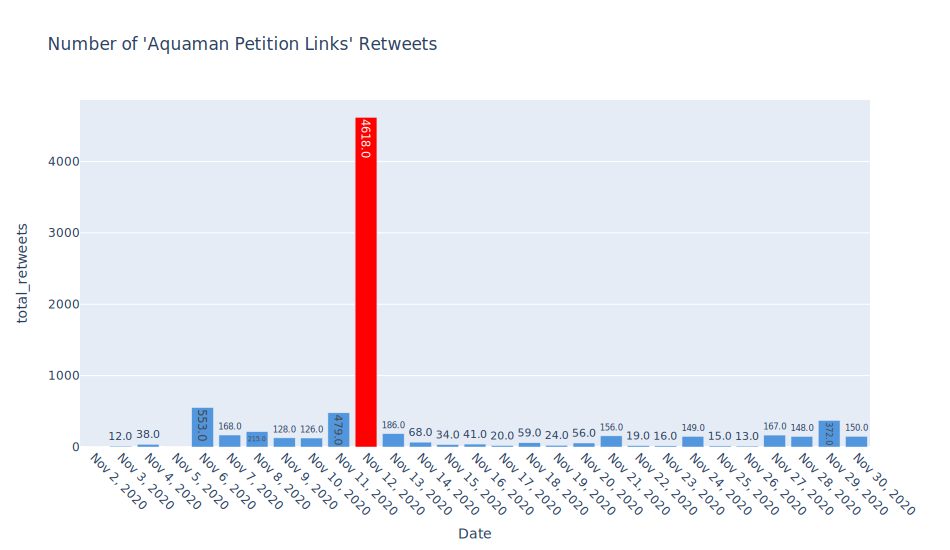

In [14]:
title = "Number of 'Aquaman Petition Links' Retweets"
helpers.bar_peaks(df_daily_metrics[["date", "total_retweets"]], title, threshold=2000, xlabel='Date')

<a id='like'></a>
>> ## Metrics Vs Time
> <ul>
 <li><a href="#retweet">Retweets</a></li>
 <li><a href="#like"><b>Likes</b></a></li>
 <li><a href="#reply">Replies</a></li>
 </ul>

## "Aquaman Petition Links" Likes On Each Day (Cluster 1 - Nov)

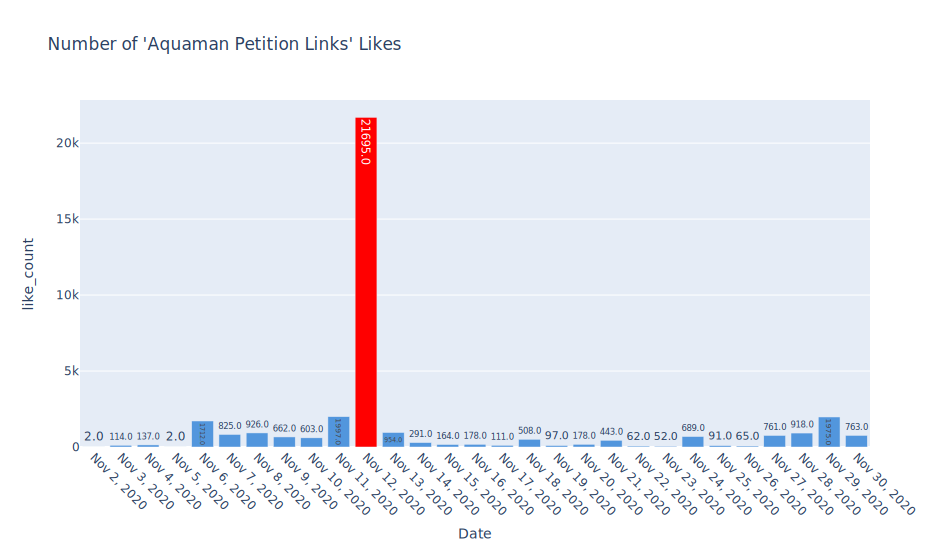

In [15]:
title = "Number of 'Aquaman Petition Links' Likes"
helpers.bar_peaks(df_daily_metrics[["date", "like_count"]], title, threshold=2000, xlabel='Date')

<a id='reply'></a>
>> ## Metrics Vs Time
> <ul>
 <li><a href="#retweet">Retweets</a></li>
 <li><a href="#like">Likes</a></li>
 <li><a href="#reply"><b>Replies</b></a></li>
 </ul>

## "Aquaman Petition Links" Replies On Each Day (Cluster 1 - Nov)

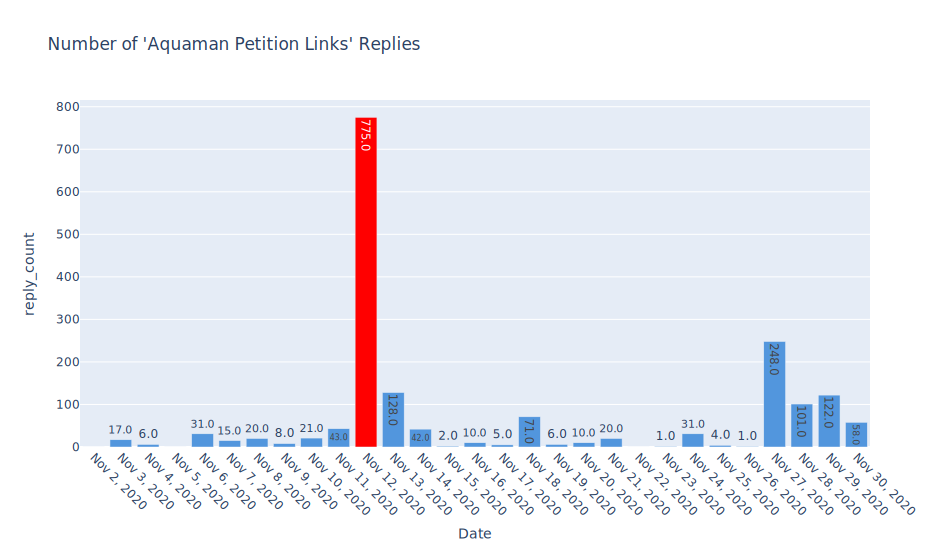

In [16]:
title = "Number of 'Aquaman Petition Links' Replies"
helpers.bar_peaks(df_daily_metrics[["date", "reply_count"]], title, threshold=500, xlabel='Date')

<a id='top_retweet'></a>
>> ## Tweets Metrics (Cluster 1 - Nov)
> <ul>
 <li><a href="#daily_metrics">Metrics Vs Time</a></li>
 <li><a href="#top_retweet"><b>Top Retweeted Tweets</b></a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

#### Retweets
A count of how many times the Tweet has been Retweeted. <br>
Please note: This does not include Quote Tweets (“Retweets with comment”). 

#### Quote Tweets
A count of how many times the Tweet has been Retweeted with a new comment (message). <br>
Please note: This does not include Retweets. <br>


**To get the “Retweets and comments” total as displayed on the Twitter clients, simply add retweet_count and quote_count. <br>
This will return the total count of Quote Tweets. There are no Quote Tweets from a paid context so all Quote Tweets are organic.**

> - **total_retweets:** is the total retweet count (Retweets + Quote Tweets)

In [17]:
top_retweet = aquaman_petition.sort_values('total_retweets', ascending=False)
with pd.option_context('display.max_colwidth', None):
    display(top_retweet[['text', 'total_retweets', 'reply_count', 'like_count', 'date', 'username', 'days_diff']].head(15))


,text,total_retweets,reply_count,like_count,date,username,days_diff
3187,over 1m people have signed a petition to remove amber heard from 'aquaman 2' https://t.co/ma06smva6y,2937.0,506.0,13515.0,2020-11-12,Fandom,4989
3106,over 1m people have signed a petition to remove amber heard from 'aquaman 2' https://t.co/yem8gxketd,1266.0,161.0,6166.0,2020-11-12,Culture Crave 🍿,1087
1814,over 500.000 people want abuser amber heard removed from aquaman 2!\n#fireamberheard #amberheardisanabuser #justiceforjohnnydepp \n\nsign here: https://t.co/p9paqm6ovi,487.0,21.0,1473.0,2020-11-06,Support Johnny Depp ♡ Stream City of Lies,1779
4998,petition to axe amber heard from ‘aquaman 2’ receives upwards 1.5m signatures following johnny depp’s ‘fantastic beasts’ departure https://t.co/crzmrbxutt,265.0,82.0,1389.0,2020-11-29,Deadline Hollywood,3114
2897,"""if it reaches that goal, then it would be one of the most signed petitions on https://t.co/rdkebiiwnv."" #amberheardisanabuser \n\nthe petition to remove amber heard from aquaman 2 is nearing 1 million signatures https://t.co/qbgupbjepg",169.0,14.0,494.0,2020-11-11,Support Johnny Depp ♡ Stream City of Lies,1784
3064,petition to remove amber heard from #aquaman2 crosses million-signature mark https://t.co/manfxfr8bh https://t.co/nsaayp2ijp,132.0,44.0,461.0,2020-11-12,Comic Book Resources,4458
2130,twitter demands amber heard removal from ‘aquaman 2’ after johnny depp 'fantastic beasts' resignation #justiceforjohnnydepp https://t.co/cmmhoduzwz,101.0,9.0,542.0,2020-11-07,Support Johnny Depp ♡ Stream City of Lies,1780
5156,an online petition urging studio personnel to remove amber heard from the upcoming 'aquaman' sequel has received more than 1.5 million signatures. https://t.co/qc1pkxcrho,97.0,44.0,389.0,2020-11-30,Deadline Hollywood,3115
4236,"it still lets me share it, so that's good. \ndc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/5iutpltqgh via @change",96.0,13.0,250.0,2020-11-21,JT Larson Depp-Mignon,4246
2517,#justiceforjohnnydepp and get amber turd fired from aquaman 2 okay thanks😁😁 https://t.co/u8fuxzfqgi,92.0,2.0,536.0,2020-11-09,coco🥕(taylor’s version),75


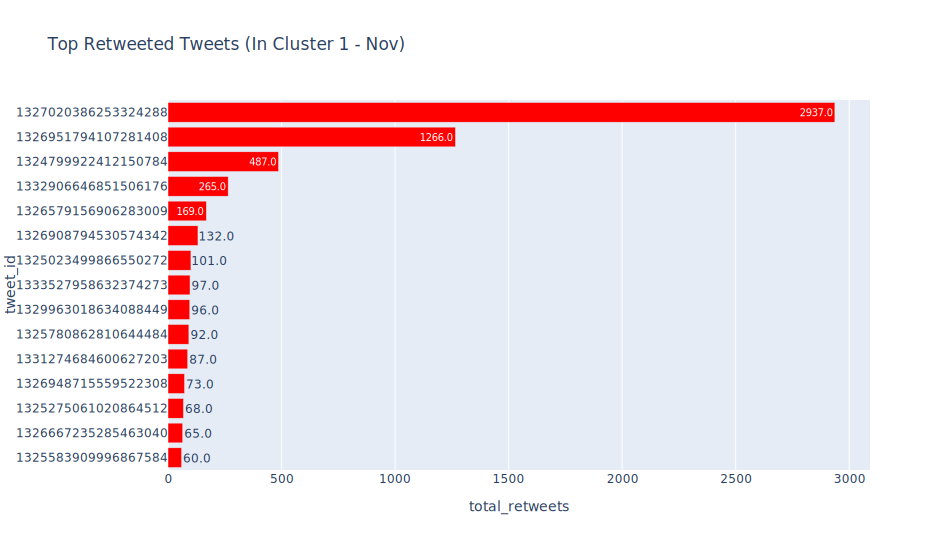

In [18]:
helpers.barh(top_retweet[['tweet_id', 'total_retweets']].head(15), "Top Retweeted Tweets (In Cluster 1 - Nov)", c='red') # c=colors

In [19]:
top_retweet.username.head(15)

3187                                       Fandom
3106                              Culture Crave 🍿
1814    Support Johnny Depp ♡ Stream City of Lies
4998                           Deadline Hollywood
2897    Support Johnny Depp ♡ Stream City of Lies
3064                         Comic Book Resources
2130    Support Johnny Depp ♡ Stream City of Lies
5156                           Deadline Hollywood
4236                        JT Larson Depp-Mignon
2517                      coco🥕(taylor’s version)
4471                                 Small Screen
3099    Support Johnny Depp ♡ Stream City of Lies
2343    Support Johnny Depp ♡ Stream City of Lies
2952    Support Johnny Depp ♡ Stream City of Lies
2459    Support Johnny Depp ♡ Stream City of Lies
Name: username, dtype: object

In [20]:
top_retweet.text.head(15).value_counts()

over 1m people have signed a petition to remove amber heard from 'aquaman 2' https://t.co/ma06smva6y                                                                                                                                                                            1
over 1m people have signed a petition to remove amber heard from 'aquaman 2' https://t.co/yem8gxketd                                                                                                                                                                            1
over 500.000 people want abuser amber heard removed from aquaman 2!\n#fireamberheard #amberheardisanabuser #justiceforjohnnydepp \n\nsign here: https://t.co/p9paqm6ovi                                                                                                         1
petition to axe amber heard from ‘aquaman 2’ receives upwards 1.5m signatures following johnny depp’s ‘fantastic beasts’ departure https://t.co/crzmrbxutt                        

In [21]:
tweets[tweets.username == 'Fandom'].text.value_counts().head()

amber heard squashes rumors that wb is replacing her in 'aquaman 2' — 'they have no basis in reality'\n\n(via @ew | https://t.co/vrrzyffjun) https://t.co/dlxvaod9ho    1
over 1m people have signed a petition to remove amber heard from 'aquaman 2' https://t.co/ma06smva6y                                                                    1
Name: text, dtype: int64


total number of tweets by "Fandom": 2


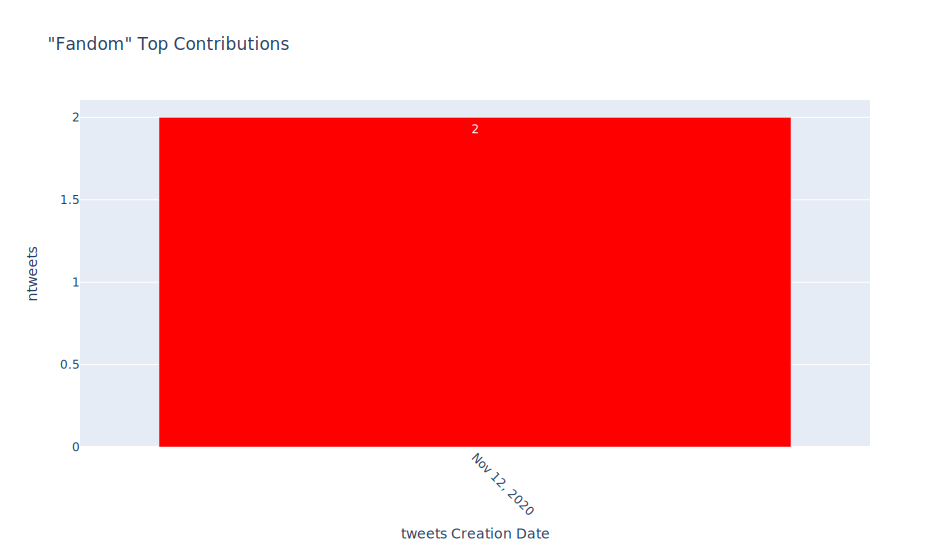

In [22]:
helpers.contr_peaks(tweets, "Fandom", n=30, threshold=0)

In [23]:
tweets[tweets.username == 'Culture Crave 🍿'].text.value_counts().head()

over 1m people have signed a petition to remove amber heard from 'aquaman 2' https://t.co/yem8gxketd    1
amber heard confirms she will return for 'aquaman 2' 🔱\n\n(via @ew) https://t.co/dlzeg1nkwe             1
Name: text, dtype: int64


total number of tweets by "Culture Crave 🍿": 2


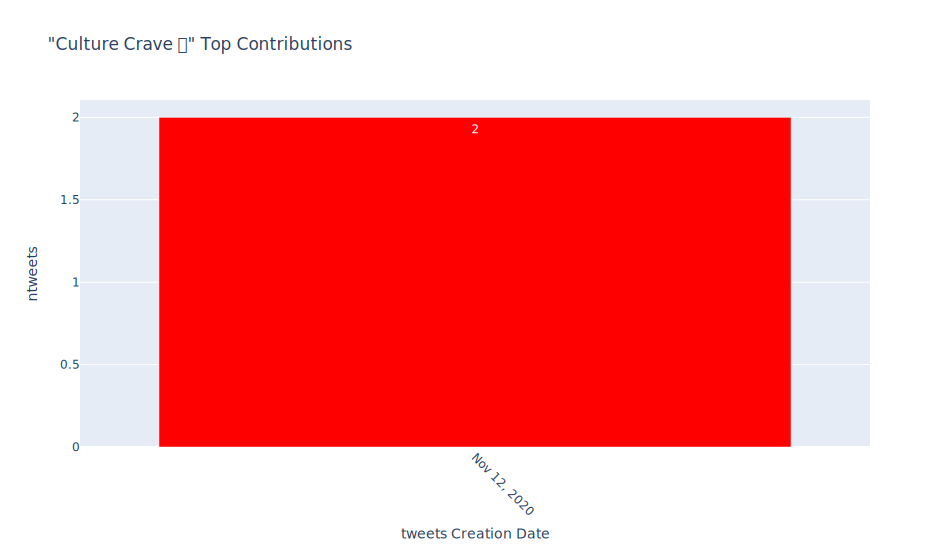

In [24]:
helpers.contr_peaks(tweets, "Culture Crave 🍿", n=30, threshold=0)


total number of tweets by "Price of Reason": 5


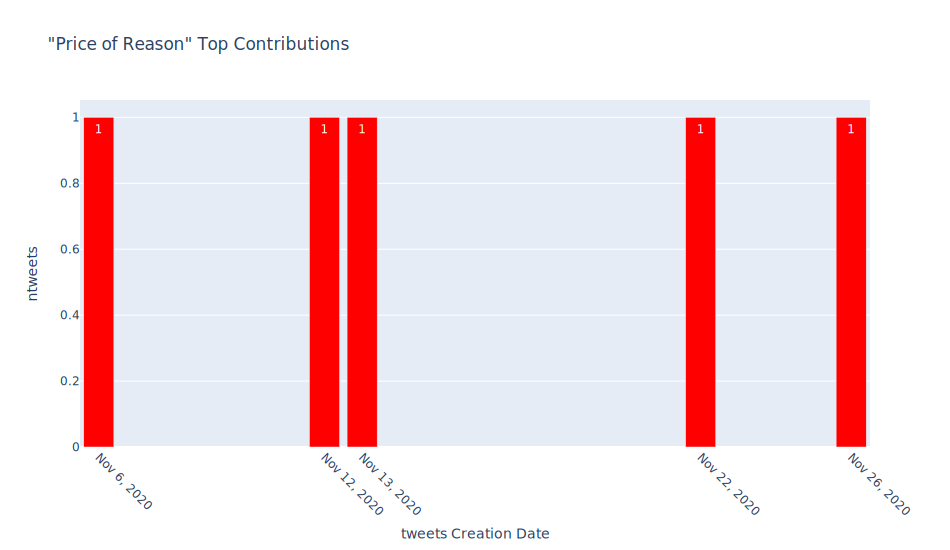

In [25]:
helpers.contr_peaks(tweets, "Price of Reason", n=30, threshold=0)

In [26]:
tweets[tweets.username == 'Price of Reason'].text.value_counts().head()

breaking: johnny depp says he has agreed to "resign" from "fantastic beasts". basically, he was fired by warner bros. but this is the more diplomatic wording to say it. this is bullsh1t! i hope this movie tanks hard at the box office. #justiceforjohnnydepp https://t.co/ide6crl3lb    1
breaking: amber heard says she's 100 percent returning for aquaman 2 and that she's super execited to start filming after she lied and ruined johnny depp's career. (source: @ew )\n#justiceforjohnnydepp https://t.co/ldqqfcabjx                                                           1
@jacxpearl @dancemachine48 i agree. the only one i heard confess to physical violence was her. he's not talking about that here. just a cheap gaslight effort by amber heard pr people.                                                                                                     1
if true, amber heard as sue storm would be such a spit in the face to fantastic four fans. i'd prefer they already bring back jessica alba. he

In [27]:
tweets[tweets.username == 'Support Johnny Depp ♡ Stream City of Lies'].text.value_counts().head()

@reuters he'll appeal https://t.co/i8i23dpz7q #justiceforjohnnydepp https://t.co/ga65j0ocuz                   4
@skynews he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv        3
@independent he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv    3
@guardian he'll appeal https://t.co/i8i23dpz7q #justiceforjohnnydepp https://t.co/ga65j0ocuz                  3
@reuters he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv        2
Name: text, dtype: int64


total number of tweets by "Support Johnny Depp ♡ Stream City of Lies": 892


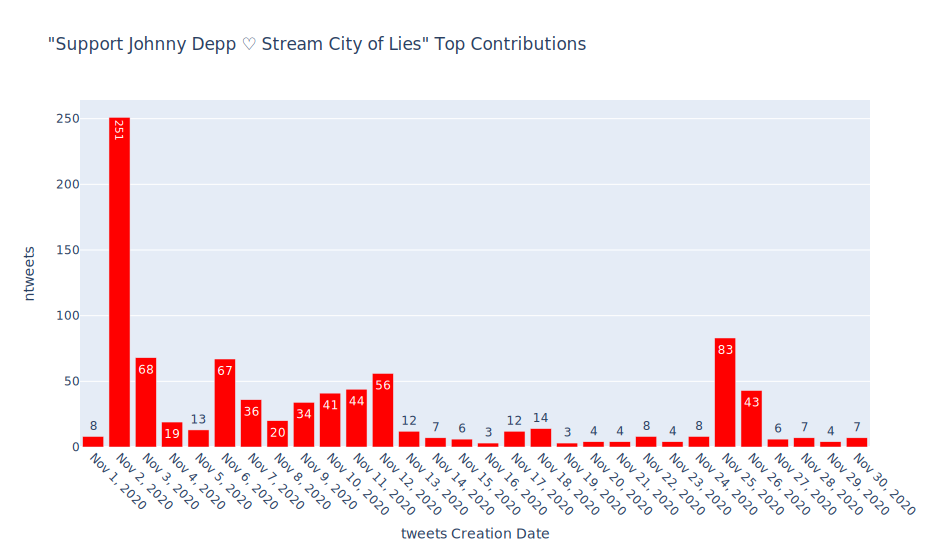

In [28]:
helpers.contr_peaks(tweets, "Support Johnny Depp ♡ Stream City of Lies", n=30, threshold=0)

<br>

---

<a id='top_like'></a>
>> ## Tweets Metrics (Cluster 1 - Nov)
> <ul>
 <li><a href="#daily_metrics">Metrics Vs Time</a></li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like"><b>Tweets with Most Likes</b></a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

In [29]:
top_liked = aquaman_petition.sort_values('like_count', ascending=False)
with pd.option_context('display.max_colwidth', None):
    display(top_retweet[['text', 'like_count', 'reply_count', 'total_retweets', 'date', 'username', 'days_diff']].head(15))
    

,text,like_count,reply_count,total_retweets,date,username,days_diff
3187,over 1m people have signed a petition to remove amber heard from 'aquaman 2' https://t.co/ma06smva6y,13515.0,506.0,2937.0,2020-11-12,Fandom,4989
3106,over 1m people have signed a petition to remove amber heard from 'aquaman 2' https://t.co/yem8gxketd,6166.0,161.0,1266.0,2020-11-12,Culture Crave 🍿,1087
1814,over 500.000 people want abuser amber heard removed from aquaman 2!\n#fireamberheard #amberheardisanabuser #justiceforjohnnydepp \n\nsign here: https://t.co/p9paqm6ovi,1473.0,21.0,487.0,2020-11-06,Support Johnny Depp ♡ Stream City of Lies,1779
4998,petition to axe amber heard from ‘aquaman 2’ receives upwards 1.5m signatures following johnny depp’s ‘fantastic beasts’ departure https://t.co/crzmrbxutt,1389.0,82.0,265.0,2020-11-29,Deadline Hollywood,3114
2897,"""if it reaches that goal, then it would be one of the most signed petitions on https://t.co/rdkebiiwnv."" #amberheardisanabuser \n\nthe petition to remove amber heard from aquaman 2 is nearing 1 million signatures https://t.co/qbgupbjepg",494.0,14.0,169.0,2020-11-11,Support Johnny Depp ♡ Stream City of Lies,1784
3064,petition to remove amber heard from #aquaman2 crosses million-signature mark https://t.co/manfxfr8bh https://t.co/nsaayp2ijp,461.0,44.0,132.0,2020-11-12,Comic Book Resources,4458
2130,twitter demands amber heard removal from ‘aquaman 2’ after johnny depp 'fantastic beasts' resignation #justiceforjohnnydepp https://t.co/cmmhoduzwz,542.0,9.0,101.0,2020-11-07,Support Johnny Depp ♡ Stream City of Lies,1780
5156,an online petition urging studio personnel to remove amber heard from the upcoming 'aquaman' sequel has received more than 1.5 million signatures. https://t.co/qc1pkxcrho,389.0,44.0,97.0,2020-11-30,Deadline Hollywood,3115
4236,"it still lets me share it, so that's good. \ndc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/5iutpltqgh via @change",250.0,13.0,96.0,2020-11-21,JT Larson Depp-Mignon,4246
2517,#justiceforjohnnydepp and get amber turd fired from aquaman 2 okay thanks😁😁 https://t.co/u8fuxzfqgi,536.0,2.0,92.0,2020-11-09,coco🥕(taylor’s version),75


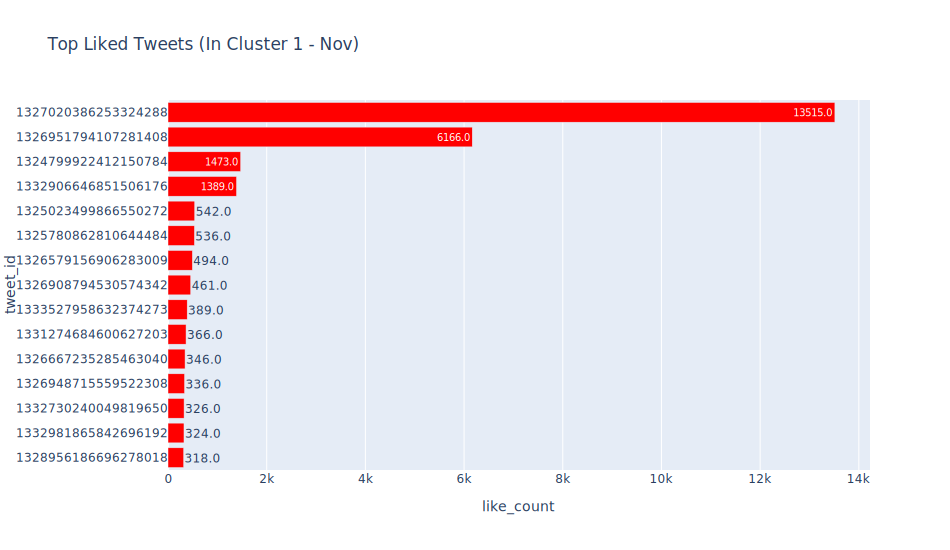

In [30]:
helpers.barh(top_liked[['tweet_id', 'like_count']].head(15), "Top Liked Tweets (In Cluster 1 - Nov)", c='red') # c=colors

In [31]:
top_liked.username.head(15)

3187                                       Fandom
3106                              Culture Crave 🍿
1814    Support Johnny Depp ♡ Stream City of Lies
4998                           Deadline Hollywood
2130    Support Johnny Depp ♡ Stream City of Lies
2517                      coco🥕(taylor’s version)
2897    Support Johnny Depp ♡ Stream City of Lies
3064                         Comic Book Resources
5156                           Deadline Hollywood
4471                                 Small Screen
2952    Support Johnny Depp ♡ Stream City of Lies
3099    Support Johnny Depp ♡ Stream City of Lies
4946    Support Johnny Depp ♡ Stream City of Lies
5018                                 Mirror Celeb
4013                                      Newsmax
Name: username, dtype: object

<br>

---

<a id='top_reply'></a>
>> ## Tweets Metrics (Cluster 1 - Nov)
> <ul>
 <li><a href="#daily_metrics">Metrics Vs Time</a></li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply"><b>Tweets with Most Replies</b></a></li>
 </ul>

In [32]:
top_replies = aquaman_petition.sort_values('reply_count', ascending=False)
with pd.option_context('display.max_colwidth', None):
    display(top_retweet[['text', 'reply_count', 'like_count', 'total_retweets', 'date', 'username', 'days_diff']].head(15))
    

,text,reply_count,like_count,total_retweets,date,username,days_diff
3187,over 1m people have signed a petition to remove amber heard from 'aquaman 2' https://t.co/ma06smva6y,506.0,13515.0,2937.0,2020-11-12,Fandom,4989
3106,over 1m people have signed a petition to remove amber heard from 'aquaman 2' https://t.co/yem8gxketd,161.0,6166.0,1266.0,2020-11-12,Culture Crave 🍿,1087
1814,over 500.000 people want abuser amber heard removed from aquaman 2!\n#fireamberheard #amberheardisanabuser #justiceforjohnnydepp \n\nsign here: https://t.co/p9paqm6ovi,21.0,1473.0,487.0,2020-11-06,Support Johnny Depp ♡ Stream City of Lies,1779
4998,petition to axe amber heard from ‘aquaman 2’ receives upwards 1.5m signatures following johnny depp’s ‘fantastic beasts’ departure https://t.co/crzmrbxutt,82.0,1389.0,265.0,2020-11-29,Deadline Hollywood,3114
2897,"""if it reaches that goal, then it would be one of the most signed petitions on https://t.co/rdkebiiwnv."" #amberheardisanabuser \n\nthe petition to remove amber heard from aquaman 2 is nearing 1 million signatures https://t.co/qbgupbjepg",14.0,494.0,169.0,2020-11-11,Support Johnny Depp ♡ Stream City of Lies,1784
3064,petition to remove amber heard from #aquaman2 crosses million-signature mark https://t.co/manfxfr8bh https://t.co/nsaayp2ijp,44.0,461.0,132.0,2020-11-12,Comic Book Resources,4458
2130,twitter demands amber heard removal from ‘aquaman 2’ after johnny depp 'fantastic beasts' resignation #justiceforjohnnydepp https://t.co/cmmhoduzwz,9.0,542.0,101.0,2020-11-07,Support Johnny Depp ♡ Stream City of Lies,1780
5156,an online petition urging studio personnel to remove amber heard from the upcoming 'aquaman' sequel has received more than 1.5 million signatures. https://t.co/qc1pkxcrho,44.0,389.0,97.0,2020-11-30,Deadline Hollywood,3115
4236,"it still lets me share it, so that's good. \ndc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/5iutpltqgh via @change",13.0,250.0,96.0,2020-11-21,JT Larson Depp-Mignon,4246
2517,#justiceforjohnnydepp and get amber turd fired from aquaman 2 okay thanks😁😁 https://t.co/u8fuxzfqgi,2.0,536.0,92.0,2020-11-09,coco🥕(taylor’s version),75


<br>

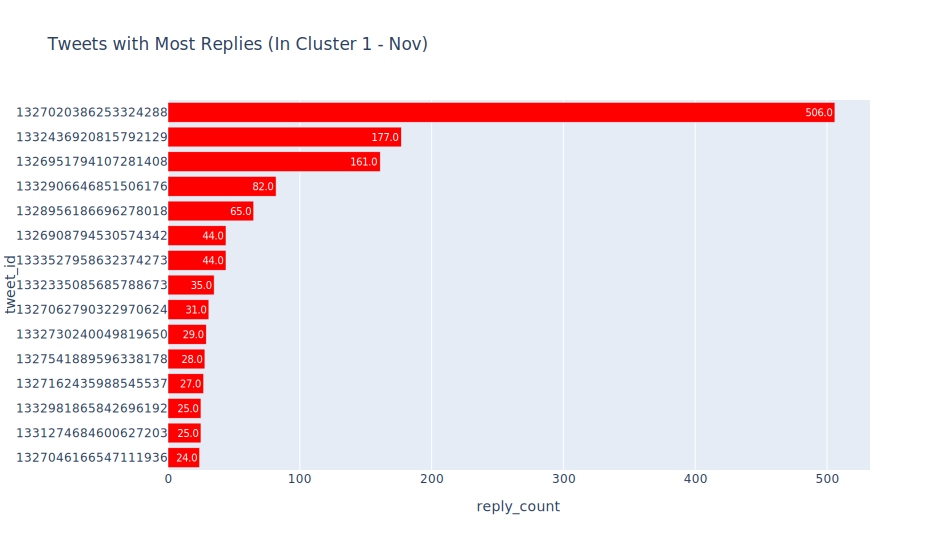

In [33]:
helpers.barh(top_replies[['tweet_id', 'reply_count']].head(15), "Tweets with Most Replies (In Cluster 1 - Nov)", c='red') # c=colors

In [34]:
top_replies.username.head(15)

3187                                       Fandom
4839                                      TheWrap
3106                              Culture Crave 🍿
4998                           Deadline Hollywood
4013                                      Newsmax
3064                         Comic Book Resources
5156                           Deadline Hollywood
4793                              The Independent
3260                                      TheWrap
4946    Support Johnny Depp ♡ Stream City of Lies
3641                              The Independent
3334                              The Independent
5018                                 Mirror Celeb
4471                                 Small Screen
3245                                     Movieweb
Name: username, dtype: object

In [35]:
tweets[tweets.username == 'TheWrap'].text.value_counts().head()

amber heard, who played mera in 2018's "aquaman," hasn't been fired and is definitely returning for the sequel https://t.co/2sbhlzpmmq                                                                1
amber heard will return for “aquaman 2” — even though 1.5 million trolls signed a change .org petition to get her fired for trying to “ruin (johnny) depp in hollywood”\n\nhttps://t.co/2sbhlzpmmq    1
Name: text, dtype: int64


total number of tweets by "TheWrap": 2


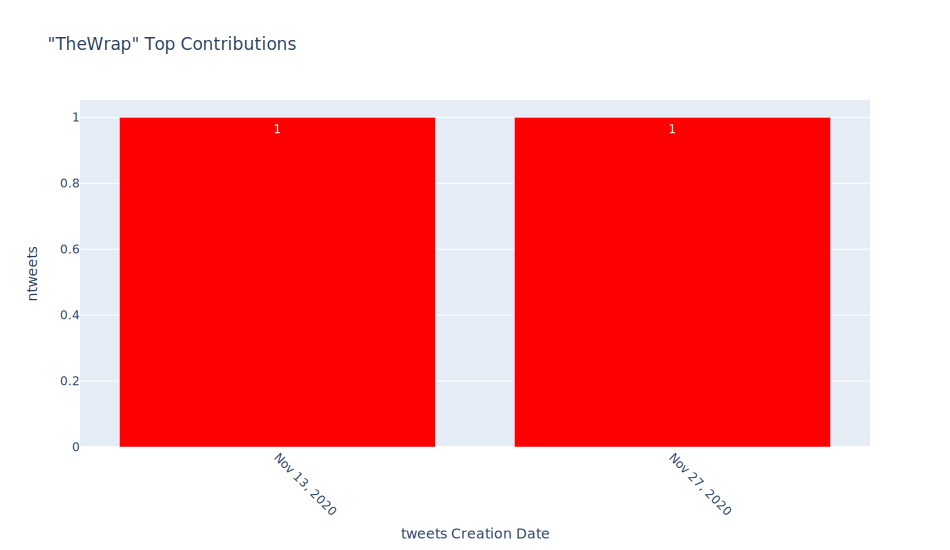

In [36]:
helpers.contr_peaks(tweets, "TheWrap", n=30, threshold=0)

---

<a id='user_tweets'></a>
> ## Users Tweets Metrics
> <ul>
 <li><a href="#tweet_metrics">Tweets Metrics</a></li>
 <li><a href="#user_tweets"><b>Users Tweets Metrics</b></a></li>  
    <li>------------------------------</li>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peaks</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
 <li><a href="#user_metrics">Users Metrics</a></li> 
 </ul>

<a id='top_user_retweet'></a>
>> ## Users Tweets Metrics
> <ul>
 <li><a href="#top_user_retweet"><b>Top Retweeted Users</b></a></li>
 <li><a href="#top_user_like">Users with Most Likes</a></li>
 <li><a href="#top_user_reply">Users with Most Replies</a></li>
 </ul>

Fandom | Support Johnny Depp ♡ Stream City of Lies | Culture Crave 🍿

In [37]:
top_retweet_u = (
    aquaman_petition.groupby(['user_id', 'username', 'user_created_at'], as_index=False) 
    ['total_retweets', 'like_count', 'reply_count'].sum()
    .sort_values('total_retweets', ascending=False)
)

top_retweet_u.head(15)    

,user_id,username,user_created_at,total_retweets,like_count,reply_count
173,1332121,Fandom,2007-03-17 03:28:55,2937.0,13515.0,506.0
364,4583281223,Support Johnny Depp ♡ Stream City of Lies,2015-12-23 23:22:52,2202.0,9761.0,205.0
466,932786452739407872,Culture Crave 🍿,2017-11-21 01:43:15,1266.0,6166.0,161.0
389,586032653,Deadline Hollywood,2012-05-20 22:10:12,362.0,1778.0,126.0
191,16031897,Comic Book Resources,2008-08-28 20:02:31,146.0,581.0,62.0
431,806570369280864256,Small Screen,2016-12-07 18:45:36,138.0,527.0,38.0
12,1027990519769714688,Stephanie Brown,2018-08-10 18:50:13,121.0,455.0,26.0
289,29229904,JT Larson Depp-Mignon,2009-04-06 16:06:16,108.0,364.0,30.0
198,16973333,The Independent,2008-10-26 00:00:29,101.0,564.0,111.0
153,1298387091705954304,coco🥕(taylor’s version),2020-08-25 22:29:54,92.0,536.0,2.0


In [38]:
# # Check duplicates in user_id --> users that changed their usernames
# top_retweet_u.duplicated(subset='user_id').sum()

In [39]:
# top_retweet_u[top_retweet_u.user_id.duplicated()]

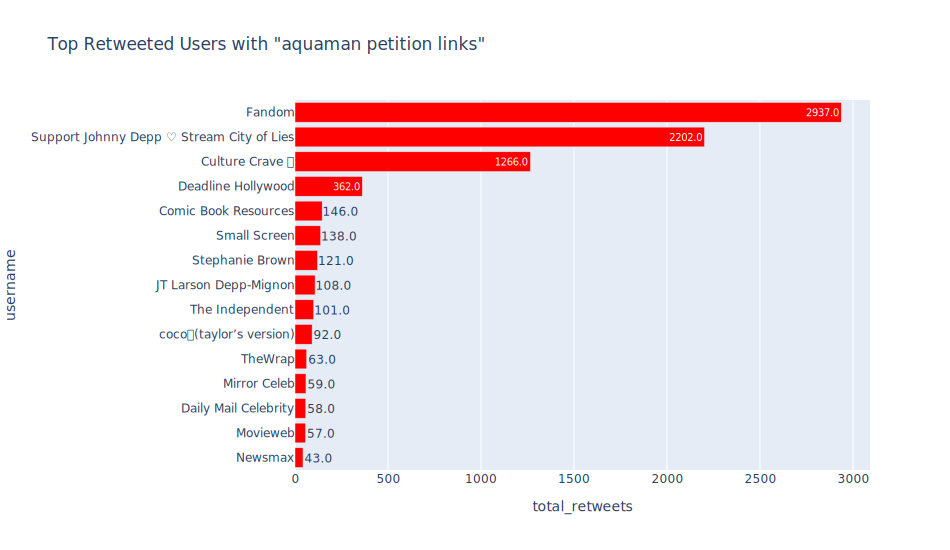

In [40]:
helpers.barh(top_retweet_u[['username', 'total_retweets']].head(15), 
             'Top Retweeted Users with "aquaman petition links"', c='red') 

<a id='top_user_like'></a>
>> ## Users Tweets Metrics
> <ul>
 <li><a href="#top_user_retweet">Top Retweeted Users</a></li>
 <li><a href="#top_user_like"><b>Users with Most Likes</b></a></li>
 <li><a href="#top_user_reply">Users with Most Replies</a></li>
 </ul>

In [41]:
top_liked_u = top_retweet_u.sort_values('like_count', ascending=False)
top_liked_u.head(15) 

,user_id,username,user_created_at,total_retweets,like_count,reply_count
173,1332121,Fandom,2007-03-17 03:28:55,2937.0,13515.0,506.0
364,4583281223,Support Johnny Depp ♡ Stream City of Lies,2015-12-23 23:22:52,2202.0,9761.0,205.0
466,932786452739407872,Culture Crave 🍿,2017-11-21 01:43:15,1266.0,6166.0,161.0
389,586032653,Deadline Hollywood,2012-05-20 22:10:12,362.0,1778.0,126.0
191,16031897,Comic Book Resources,2008-08-28 20:02:31,146.0,581.0,62.0
198,16973333,The Independent,2008-10-26 00:00:29,101.0,564.0,111.0
153,1298387091705954304,coco🥕(taylor’s version),2020-08-25 22:29:54,92.0,536.0,2.0
431,806570369280864256,Small Screen,2016-12-07 18:45:36,138.0,527.0,38.0
12,1027990519769714688,Stephanie Brown,2018-08-10 18:50:13,121.0,455.0,26.0
289,29229904,JT Larson Depp-Mignon,2009-04-06 16:06:16,108.0,364.0,30.0


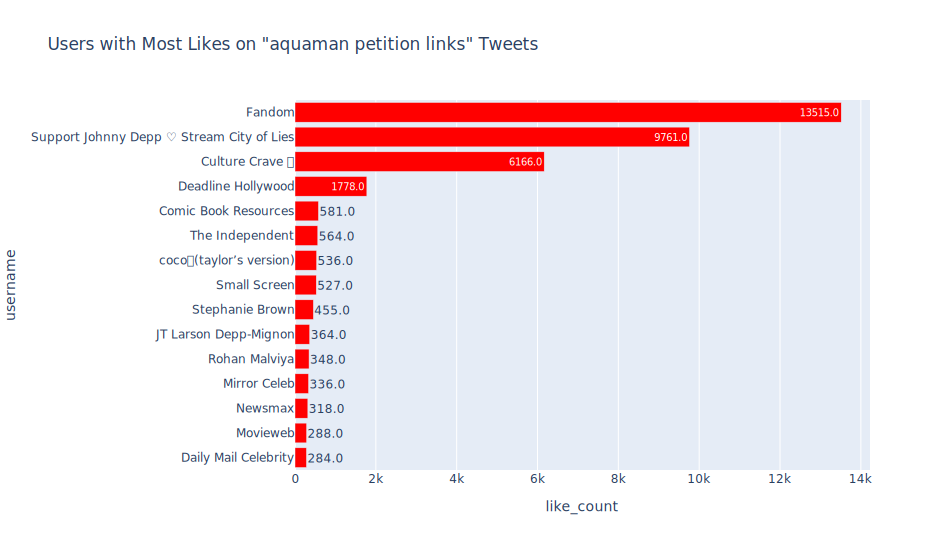

In [42]:
helpers.barh(top_liked_u[['username', 'like_count']].head(15), 
             'Users with Most Likes on "aquaman petition links" Tweets', c='red') 

<a id='top_user_reply'></a>
>> ## Users Tweets Metrics
> <ul>
 <li><a href="#top_user_retweet">Top Retweeted Users</a></li>
 <li><a href="#top_user_like">Users with Most Likes</a></li>
 <li><a href="#top_user_reply"><b>Users with Most Replies</b></a></li>
 </ul>

In [43]:
top_replies_u = top_retweet_u.sort_values('reply_count', ascending=False)
top_replies_u.head(15) 

,user_id,username,user_created_at,total_retweets,like_count,reply_count
173,1332121,Fandom,2007-03-17 03:28:55,2937.0,13515.0,506.0
206,18742360,TheWrap,2009-01-07 22:37:11,63.0,70.0,208.0
364,4583281223,Support Johnny Depp ♡ Stream City of Lies,2015-12-23 23:22:52,2202.0,9761.0,205.0
466,932786452739407872,Culture Crave 🍿,2017-11-21 01:43:15,1266.0,6166.0,161.0
389,586032653,Deadline Hollywood,2012-05-20 22:10:12,362.0,1778.0,126.0
198,16973333,The Independent,2008-10-26 00:00:29,101.0,564.0,111.0
221,20545835,Newsmax,2009-02-10 21:04:49,43.0,318.0,65.0
191,16031897,Comic Book Resources,2008-08-28 20:02:31,146.0,581.0,62.0
431,806570369280864256,Small Screen,2016-12-07 18:45:36,138.0,527.0,38.0
385,55204143,Mirror Celeb,2009-07-09 10:59:24,59.0,336.0,34.0


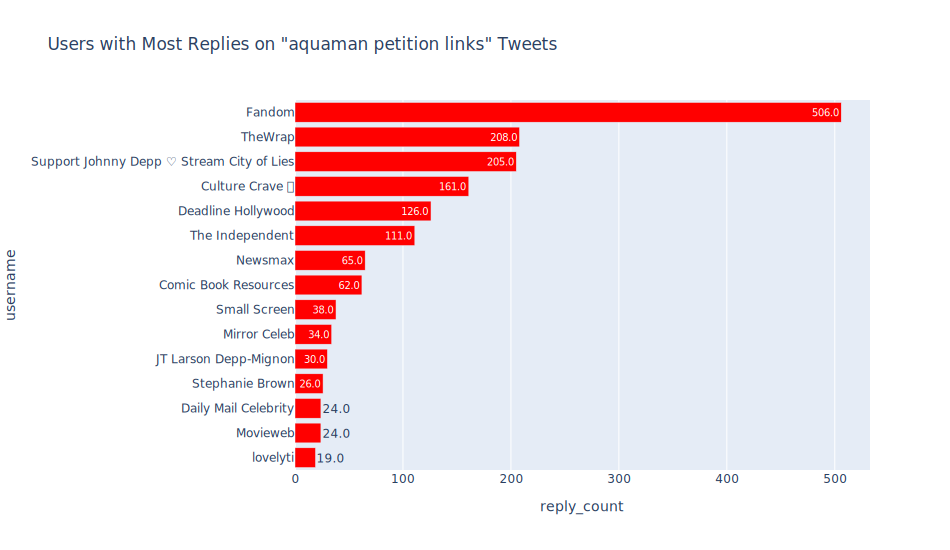

In [44]:
helpers.barh(top_replies_u[['username', 'reply_count']].head(15), 
             'Users with Most Replies on "aquaman petition links" Tweets', c='red')

---

<a id='diff'></a>
> ## Tweeting Duration After Account Creation
> <ul>
 <li><a href="#tweet_metrics">Tweets Metrics</a></li>
 <li><a href="#user_tweets">Users Tweets Metrics</a></li>  
    <li>------------------------------</li>
 <li><a href="#diff"><b>Duration After Account Creation</b></a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peaks</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
 <li><a href="#user_metrics">Users Metrics</a></li> 
 </ul>

>### Tweets Within the same month of Account Creation (Cluster 1 - Nov 2020)
>> <ul>
 <li><a href="#same_d">Same Day</a></li>
 <li><a href="#same_w">Same Week</a></li>
 <li><a href="#same_m">Same Month</a></li>
 </ul>

In [45]:
diff_m = tweets[tweets.days_diff < 30]
diff_m_counts = diff_m.groupby('days_diff').size().reset_index(name='n_tweets')
# diff_m_counts


Total Tweets Within the same month of Account Creation: 183


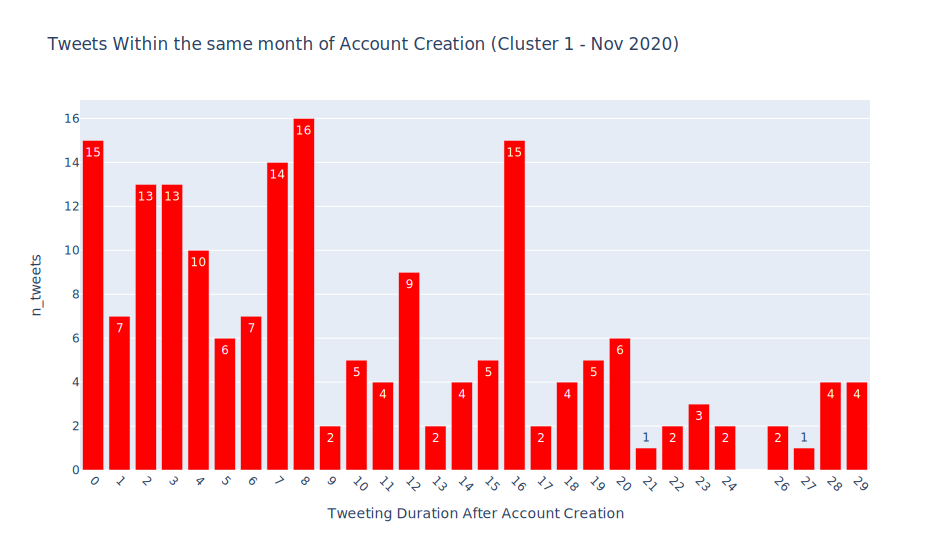

In [46]:
print(f'\nTotal Tweets Within the same month of Account Creation: {diff_m_counts.n_tweets.sum()}')
title = 'Tweets Within the same month of Account Creation (Cluster 1 - Nov 2020)'
helpers.bar_peaks(diff_m_counts, title, threshold=0, xlabel='Tweeting Duration After Account Creation')

<a id='same_d'></a>
>### The SAME DAY
>> <ul>
 <li><a href="#same_d"><b>Same Day</b></a></li>
 <li><a href="#same_w">Same Week</a></li>
 <li><a href="#same_m">Same Month</a></li>
 </ul>

In [47]:
print('The number of accounts tweeted the same day they was created!')
tweets[tweets['days_diff'] == 0].shape[0]

The number of accounts tweeted the same day they was created!


15

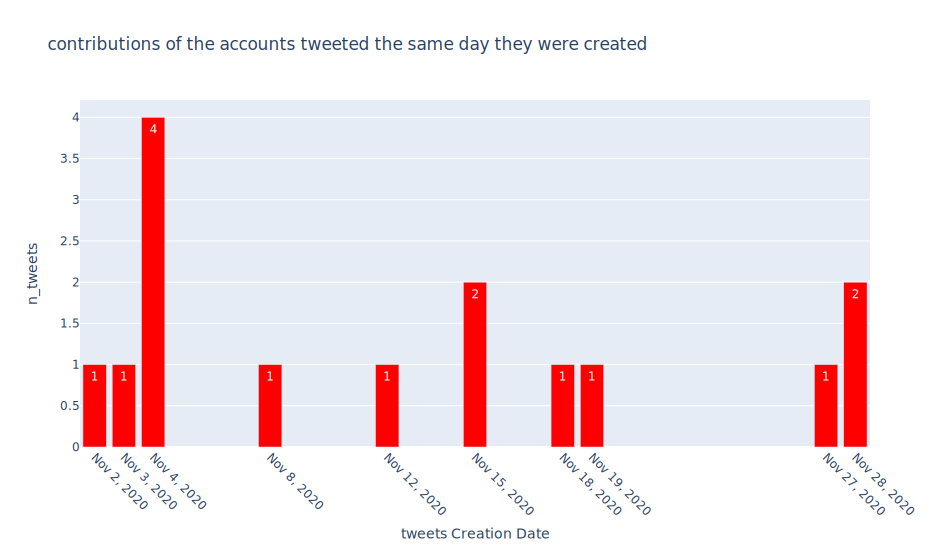

In [48]:
title = 'contributions of the accounts tweeted the same day they were created'
df = tweets[tweets['days_diff'] == 0].groupby('date').size().reset_index(name='n_tweets')
helpers.bar_peaks(df, title, threshold=0, xlabel='tweets Creation Date')

In [49]:
tweets[tweets['days_diff'] == 0].username.value_counts()

MrKnowItAll                            2
gab ☮︎ ٭                               2
teddington                             2
Emma Wells Tennis in Wimbledon Park    1
Erika Bestor                           1
Lindsey Depp                           1
James                                  1
Read Hearing                           1
chrystalneveah                         1
Mistica Davis 🇺🇸🏴‍☠️                   1
ASTIG List                             1
mash                                   1
Name: username, dtype: int64

In [50]:
tweets[tweets['days_diff'] == 0].text.value_counts()

timeline of johnny depp and amber heard's relationship - wimbledon guardian https://t.co/4gedilk4ih                                                                                                                                                                                                         1
@mygrindelwald i have never wanted this more than i do now. amber is a disgrace! #amberheardisanabuser                                                                                                                                                                                                      1
@dior dear dior regarding my husband to be's future of the amazing sauvage ad please keep him employed as the face of sauvage.  what happened in the  barrack result of his libel case against the sun and dan wootton and amber heard are just ganging up on him.                                          1
hi everyone, here i will write on popular topics, currently about the trial  johnny depp and a

>**NOTE:**
>- Most of the (user_url)s are None
>- Might be banned or deleted

In [51]:
tweets[tweets['days_diff'] == 0]

,text,n_followers,n_statuses,user_url,username,created_at,user_created_at,user_id,lang,profile_banner_url,user_description,profile_image_url,user_screen_name,user_location,n_friends,tweet_id,is_verified,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_retweets
489,timeline of johnny depp and amber heard's rela...,6,3265,https://t.co/bNl9CfETss,Emma Wells Tennis in Wimbledon Park,2020-11-02 13:27:21,2020-11-01 13:31:08,1322893517455314953,en,https://pbs.twimg.com/profile_banners/13228935...,Tennis for life! Junior and adult tennis coach...,http://pbs.twimg.com/profile_images/1322894157...,coach_wimbledon,"Wimbledon Park, London",39,1323255376989532160,False,2020-11-02,2020,Nov,2,13,0 days 23:56:13,0,23:56:13,0.0,0.0,0.0,0.0,0.0
1175,@mygrindelwald i have never wanted this more t...,5,55,None,Erika Bestor,2020-11-03 06:31:48,2020-11-02 17:00:53,1323309075535257600,en,https://pbs.twimg.com/profile_banners/13233090...,Disabled musical person trying to bring justic...,http://pbs.twimg.com/profile_images/1323514442...,BestorErika,,11,1323513188311158785,False,2020-11-03,2020,Nov,3,6,0 days 13:30:55,0,13:30:55,0.0,0.0,0.0,0.0,0.0
1476,@dior dear dior regarding my husband to be's f...,16,504,None,Lindsey Depp,2020-11-04 07:39:48,2020-11-03 23:49:31,1323774161110683648,en,None,I'm unique,http://pbs.twimg.com/profile_images/1323775158...,LindseyDepp2,,34,1323892689696366593,False,2020-11-04,2020,Nov,4,7,0 days 07:50:17,0,07:50:17,0.0,0.0,0.0,0.0,0.0
1483,"hi everyone, here i will write on popular topi...",1,4,None,James,2020-11-04 10:16:53,2020-11-04 09:59:30,1323927710054424576,en,None,"люблю хорошие игры, фильмы и книги, играю на г...",http://pbs.twimg.com/profile_images/1324280272...,James84045606,,0,1323932219870793731,False,2020-11-04,2020,Nov,4,10,0 days 00:17:23,0,00:17:23,0.0,0.0,2.0,0.0,0.0
1493,johnny depp loses london libel case involving ...,160,2547,None,MrKnowItAll,2020-11-04 13:43:39,2020-11-03 21:27:10,1323738360767148032,en,https://pbs.twimg.com/profile_banners/13237383...,I Know Everything,http://pbs.twimg.com/profile_images/1336318046...,MrKnowI00143571,,982,1323984256457089025,False,2020-11-04,2020,Nov,4,13,0 days 16:16:29,0,16:16:29,0.0,0.0,0.0,0.0,0.0
1494,judge rules a pet likely pooped in johnny depp...,160,2547,None,MrKnowItAll,2020-11-04 13:45:15,2020-11-03 21:27:10,1323738360767148032,en,https://pbs.twimg.com/profile_banners/13237383...,I Know Everything,http://pbs.twimg.com/profile_images/1336318046...,MrKnowI00143571,,982,1323984658200080386,False,2020-11-04,2020,Nov,4,13,0 days 16:18:05,0,16:18:05,0.0,0.0,1.0,0.0,0.0
2289,@kamalaharris together like johnny depp and am...,20,244,None,Read Hearing,2020-11-08 00:43:23,2020-11-07 12:29:17,1325052500844613632,en,https://pbs.twimg.com/profile_banners/13250525...,What government wants government takes | Quest...,http://pbs.twimg.com/profile_images/1325254863...,read_hearing,United States,299,1325237445110231040,False,2020-11-08,2020,Nov,8,0,0 days 12:14:06,0,12:14:06,0.0,0.0,0.0,0.0,0.0
2968,the johnny depp amber heard case is why men st...,5,8,None,chrystalneveah,2020-11-12 01:45:48,2020-11-12 01:38:17,1326700765012873218,en,None,❤️I hope karma slaps you in the face before I ...,http://pbs.twimg.com/profile_images/1326700944...,chrystalneveah1,,7,1326702705042075648,False,2020-11-12,2020,Nov,12,1,0 days 00:07:31,0,00:07:31,0.0,0.0,0.0,0.0,0.0
3728,i wonder how it feels to know i’ve caused emot...,1181,10930,https://t.co/tMeUBroSNX,gab ☮︎ ٭,2020-11-15 06:07:15,2020-11-14 23:12:16,1327751198305345536,en,https://pbs.twimg.com/profile_banners/13277511...,#LEIA : “ well i guess you don’t know everythi...,http://pbs.twimg.com/profile_images/1379920220...,J0HNNYPUFF,,787,1327855664614559744,False,2020-11-15,2020,Nov,15,6,0 days 06:54:59,0,06:54:59,NaN,NaN,NaN,NaN,NaN
3777,i think pinocchio is a better liar than amber ...,1181,10930,https://t.co/tMeUBroSNX,gab ☮︎ ٭,2020-11-15 20:23:42,2020-11-14 23:12:16,132

>**NOTE:**
>- "chrystalneveah", "mash" tweeted after 7 minutes of account creation

In [52]:
tweets[tweets['username'].isin(["chrystalneveah", "mash"])]

,text,n_followers,n_statuses,user_url,username,created_at,user_created_at,user_id,lang,profile_banner_url,user_description,profile_image_url,user_screen_name,user_location,n_friends,tweet_id,is_verified,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_retweets
2968,the johnny depp amber heard case is why men st...,5,8,None,chrystalneveah,2020-11-12 01:45:48,2020-11-12 01:38:17,1326700765012873218,en,None,❤️I hope karma slaps you in the face before I ...,http://pbs.twimg.com/profile_images/1326700944...,chrystalneveah1,,7,1326702705042075648,False,2020-11-12,2020,Nov,12,1,0 days 00:07:31,0,00:07:31,0.0,0.0,0.0,0.0,0.0
4905,no amber heard is not replacing brie larson or...,0,17,None,mash,2020-11-28 08:43:49,2020-11-28 08:36:47,1332604316654383104,en,None,,http://abs.twimg.com/sticky/default_profile_im...,mash74754943,,0,1332606110289829888,False,2020-11-28,2020,Nov,28,8,0 days 00:07:02,0,00:07:02,0.0,0.0,1.0,0.0,0.0


In [53]:
tweets[tweets['username'].isin(["chrystalneveah", "mash"])].user_description.value_counts()

❤️I hope karma slaps you in the face before I do❤️    1
                                                      1
Name: user_description, dtype: int64

In [54]:
tweets[tweets['username'].isin(["chrystalneveah", "mash"])].text.value_counts()

the johnny depp amber heard case is why men stay silent https://t.co/yanmhqezpm via @youtube                                1
no amber heard is not replacing brie larson or joining the mcu (a rant) https://t.co/0yzvst469a via @youtube brie larson    1
Name: text, dtype: int64

<a id='same_w'></a>
>### The SAME WEEK
>> <ul>
 <li><a href="#same_d">Same Day</a></li>
 <li><a href="#same_w"><b>Same Week</b></a></li>
 <li><a href="#same_m">Same Month</a></li>
 </ul>

In [55]:
print('The number of accounts tweeted the same week they was created!')
tweets[tweets['days_diff'] <= 7].shape[0]

The number of accounts tweeted the same week they was created!


85

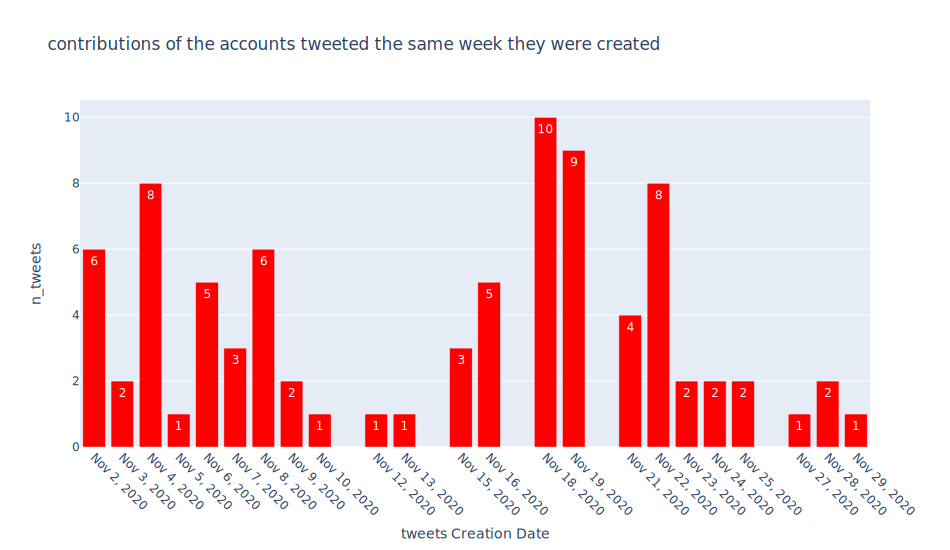

In [56]:
title = 'contributions of the accounts tweeted the same week they were created'
df = tweets[tweets['days_diff'] <= 7].groupby('date').size().reset_index(name='n_tweets')
helpers.bar_peaks(df, title, threshold=0, xlabel='tweets Creation Date')

<br>

### "Aquaman Petition Links" --> same week

In [57]:
print('The number of accounts tweeted "Aquaman Petition Links" the same week they was created!')
aquaman_petition[aquaman_petition['days_diff'] <= 7].shape[0]

The number of accounts tweeted "Aquaman Petition Links" the same week they was created!


5

In [58]:
aquaman_petition[aquaman_petition['days_diff'] <= 7].username.value_counts()

Erika Bestor    4
DailyNews       1
Name: username, dtype: int64

>**NOTE:**
>- Erika Bestor user_url is None
>- Might be banned or deleted

In [59]:
aquaman_petition[aquaman_petition['days_diff'] <= 7].text.value_counts()

dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/ghd8zegee5 via @change                                                                                            1
l'oréal: remove amber heard as l'oreal spokesperson - sign the petition! https://t.co/9yvy9ssrc5 via @change                                                                                            1
all decent human beings who believe in justice: boycott warner brothers for removing johnny depp but keeping amber heard - sign the petition! https://t.co/gjmoiwgcnh via @change                       1
i will be posting all of the petitions that need to be signed. let's send a message to survivors that they count and this abuser needs to be gone!! #justiceforjohnnydepp\n\nhttps://t.co/xridvbfn9u    1
amber heard responds to calls for her removal from ‘aquaman 2’ https://t.co/tgrxqd1rj4                                                                                                          

In [60]:
aquaman_petition[aquaman_petition['days_diff'] <= 7]

,text,n_followers,n_statuses,user_url,username,created_at,user_created_at,user_id,lang,profile_banner_url,user_description,profile_image_url,user_screen_name,user_location,n_friends,tweet_id,is_verified,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_retweets
1527,dc entertainment: remove amber heard from aqua...,5,55,None,Erika Bestor,2020-11-04 20:09:00,2020-11-02 17:00:53,1323309075535257600,en,https://pbs.twimg.com/profile_banners/13233090...,Disabled musical person trying to bring justic...,http://pbs.twimg.com/profile_images/1323514442...,BestorErika,,11,1324081232418725888,False,2020-11-04,2020,Nov,4,20,2 days 03:08:07,2,03:08:07,0.0,0.0,0.0,0.0,0.0
1613,l'oréal: remove amber heard as l'oreal spokesp...,5,55,None,Erika Bestor,2020-11-06 06:10:53,2020-11-02 17:00:53,1323309075535257600,en,https://pbs.twimg.com/profile_banners/13233090...,Disabled musical person trying to bring justic...,http://pbs.twimg.com/profile_images/1323514442...,BestorErika,,11,1324595090086531072,False,2020-11-06,2020,Nov,6,6,3 days 13:10:00,3,13:10:00,1.0,0.0,1.0,0.0,1.0
1758,all decent human beings who believe in justice...,5,55,None,Erika Bestor,2020-11-06 18:22:11,2020-11-02 17:00:53,1323309075535257600,en,https://pbs.twimg.com/profile_banners/13233090...,Disabled musical person trying to bring justic...,http://pbs.twimg.com/profile_images/1323514442...,BestorErika,,11,1324779127174393858,False,2020-11-06,2020,Nov,6,18,4 days 01:21:18,4,01:21:18,0.0,0.0,2.0,0.0,0.0
2435,i will be posting all of the petitions that ne...,5,55,None,Erika Bestor,2020-11-08 20:18:58,2020-11-02 17:00:53,1323309075535257600,en,https://pbs.twimg.com/profile_banners/13233090...,Disabled musical person trying to bring justic...,http://pbs.twimg.com/profile_images/1323514442...,BestorErika,,11,1325533290397200384,False,2020-11-08,2020,Nov,8,20,6 days 03:18:05,6,03:18:05,0.0,0.0,0.0,0.0,0.0
3471,amber heard responds to calls for her removal ...,0,1386,https://t.co/4FriMh7zmu,DailyNews,2020-11-13 15:58:56,2020-11-10 10:45:41,1326113749195894784,en,None,Daily News Portal,http://pbs.twimg.com/profile_images/1326116183...,floordailynews,India,0,1327279790160744449,False,2020-11-13,2020,Nov,13,15,3 days 05:13:15,3,05:13:15,0.0,0.0,0.0,0.0,0.0


<a id='same_m'></a>
>### The SAME MONTH
>> <ul>
 <li><a href="#same_d">Same Day</a></li>
 <li><a href="#same_w">Same Week</a></li>
 <li><a href="#same_m"><b>Same Month</b></a></li>
 </ul>

In [61]:
print('The number of accounts tweeted "Aquaman Petition Links" the same month they was created!')
aquaman_petition[aquaman_petition['days_diff'] <= 30].shape[0]

The number of accounts tweeted "Aquaman Petition Links" the same month they was created!


13

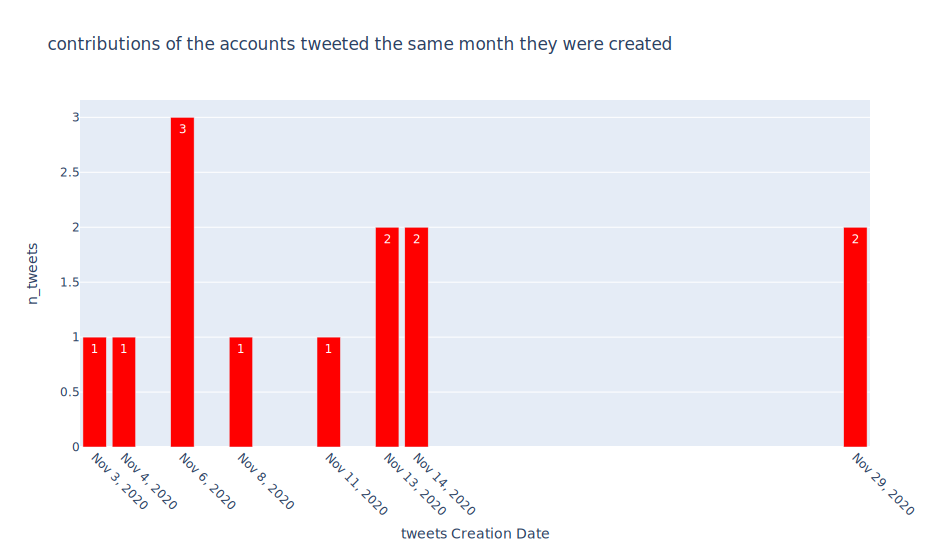

In [62]:
title = 'contributions of the accounts tweeted the same month they were created'
df = aquaman_petition[aquaman_petition['days_diff'] <= 30].groupby('date').size().reset_index(name='n_tweets')
helpers.bar_peaks(df, title, threshold=0, xlabel='tweets Creation Date')

In [63]:
aquaman_petition[aquaman_petition['days_diff'] <= 30].username.value_counts()

Erika Bestor    4
Anghel          2
steelking       2
TechiUpdate     1
DailyNews       1
Lindsey Depp    1
mick            1
b miller        1
Name: username, dtype: int64

In [64]:
aquaman_petition[aquaman_petition['days_diff'] <= 30].text.value_counts()

britain : justice nicol needs to be fired! justice for male da survivors! - sign the petition! #justiceforjohnnydepp #amberheardisaliar  https://t.co/hwvy4ftgp4 via @change                                        1
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/ghd8zegee5 via @change                                                                                                        1
l'oréal: remove amber heard as l'oreal spokesperson - sign the petition! https://t.co/9yvy9ssrc5 via @change                                                                                                        1
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/3w7jgx1xql via @change                                                                                                        1
all decent human beings who believe in justice: boycott warner brothers for removing johnny depp but keeping amber heard - sign the petition! ht

In [65]:
aquaman_petition[aquaman_petition['days_diff'] <= 30]

,text,n_followers,n_statuses,user_url,username,created_at,user_created_at,user_id,lang,profile_banner_url,user_description,profile_image_url,user_screen_name,user_location,n_friends,tweet_id,is_verified,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_retweets
1131,britain : justice nicol needs to be fired! jus...,1,8,https://t.co/OK5jGajTS6,Anghel,2020-11-03 02:12:38,2020-10-14 06:17:54,1316261881405935616,en,https://pbs.twimg.com/profile_banners/13162618...,"I'm just a weird 20 year old who loves gaming,...",http://pbs.twimg.com/profile_images/1316270438...,AnghelStryker,"Missouri, USA",21,1323447966804463617,False,2020-11-03,2020,Nov,3,2,19 days 19:54:44,19,19:54:44,NaN,NaN,NaN,NaN,NaN
1527,dc entertainment: remove amber heard from aqua...,5,55,None,Erika Bestor,2020-11-04 20:09:00,2020-11-02 17:00:53,1323309075535257600,en,https://pbs.twimg.com/profile_banners/13233090...,Disabled musical person trying to bring justic...,http://pbs.twimg.com/profile_images/1323514442...,BestorErika,,11,1324081232418725888,False,2020-11-04,2020,Nov,4,20,2 days 03:08:07,2,03:08:07,0.0,0.0,0.0,0.0,0.0
1613,l'oréal: remove amber heard as l'oreal spokesp...,5,55,None,Erika Bestor,2020-11-06 06:10:53,2020-11-02 17:00:53,1323309075535257600,en,https://pbs.twimg.com/profile_banners/13233090...,Disabled musical person trying to bring justic...,http://pbs.twimg.com/profile_images/1323514442...,BestorErika,,11,1324595090086531072,False,2020-11-06,2020,Nov,6,6,3 days 13:10:00,3,13:10:00,1.0,0.0,1.0,0.0,1.0
1724,dc entertainment: remove amber heard from aqua...,1,8,https://t.co/OK5jGajTS6,Anghel,2020-11-06 17:44:49,2020-10-14 06:17:54,1316261881405935616,en,https://pbs.twimg.com/profile_banners/13162618...,"I'm just a weird 20 year old who loves gaming,...",http://pbs.twimg.com/profile_images/1316270438...,AnghelStryker,"Missouri, USA",21,1324769723721146381,False,2020-11-06,2020,Nov,6,17,23 days 11:26:55,23,11:26:55,NaN,NaN,NaN,NaN,NaN
1758,all decent human beings who believe in justice...,5,55,None,Erika Bestor,2020-11-06 18:22:11,2020-11-02 17:00:53,1323309075535257600,en,https://pbs.twimg.com/profile_banners/13233090...,Disabled musical person trying to bring justic...,http://pbs.twimg.com/profile_images/1323514442...,BestorErika,,11,1324779127174393858,False,2020-11-06,2020,Nov,6,18,4 days 01:21:18,4,01:21:18,0.0,0.0,2.0,0.0,0.0
2435,i will be posting all of the petitions that ne...,5,55,None,Erika Bestor,2020-11-08 20:18:58,2020-11-02 17:00:53,1323309075535257600,en,https://pbs.twimg.com/profile_banners/13233090...,Disabled musical person trying to bring justic...,http://pbs.twimg.com/profile_images/1323514442...,BestorErika,,11,1325533290397200384,False,2020-11-08,2020,Nov,8,20,6 days 03:18:05,6,03:18:05,0.0,0.0,0.0,0.0,0.0
2951,pirates of the caribbean johnny depp: 1 millio...,156,37504,https://t.co/aSnR9l7FVB,TechiUpdate,2020-11-11 23:23:00,2020-10-23 07:18:15,1319538411372384261,en,https://pbs.twimg.com/profile_banners/13195384...,Latest Update Around The World\n\nPlease follo...,http://pbs.twimg.com/profile_images/1319538755...,TechiUpdate,,0,1326666768438456322,False,2020-11-11,2020,Nov,11,23,19 days 16:04:45,19,16:04:45,0.0,0.0,0.0,0.0,0.0
3267,one million people want amber heard fired off ...,60,3026,None,steelking,2020-11-13 01:52:42,2020-10-16 18:43:07,1317174111836213249,en,None,I NEEDED TO MAKE A NEW TWITTER ACCOUNT THERE A...,http://pbs.twimg.com/profile_images/1317174496...,steelking16,,894,1327066831178313730,False,2020-11-13,2020,Nov,13,1,27 days 07:09:35,27,07:09:35,0.0,0.0,0.0,0.0,0.0
3471,amber heard responds to calls for her removal ...,0,1386,https://t.co/4FriMh7zmu,DailyNews,2020-11-13 15:58:56,2020-11-10 10:45:41,1326113749195894784,en,None,Daily News Portal,http://pbs.twimg.com/profile_images/1326116183...,floordailynews,India,0,1327279790160744449,False,2020-11-13,2020,Nov,13,15,3 days 05:13:15,3,05:13:15,0.0,0.0,0.0,0.0,0.0
3593,amber heard petition to remov

<br>

---

<br>

<a id='over_time'></a>
> ## "Aquaman Petition" Tweets Created OVER TIME
> <ul>
 <li><a href="#tweet_metrics">Tweets Metrics</a></li>
 <li><a href="#user_tweets">Users Tweets Metrics</a></li>  
    <li>------------------------------</li>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time"><b>Tweets Created OVER TIME</b></a></li>
 <li><a href="#top_peaks">Tweets on Peaks</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
 <li><a href="#user_metrics">Users Metrics</a></li> 
 </ul>

<a id='all_years'></a>
>>### Total "Aquman Petition" Tweets (in this custer)
> <ul>
 <li><a href="#all_years"><b>Total "Aquman Petition" Tweets (in this custer)</b></a></li>
 <li><a href="#2020_days">Tweets Created in Each Day of Nov 2020</a></li>  
 </ul>

Twitter was officially launched on December 15, 2005

In [66]:
df_creations.date.min(), df_creations.date.max()

(Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-30 00:00:00'))

In [67]:
df_years = df_creations.groupby('year')['n_tweets'].sum().reset_index()

In [68]:
# helpers.pie(df_years, "Number of 'Aquman Petition' Tweets over Years")

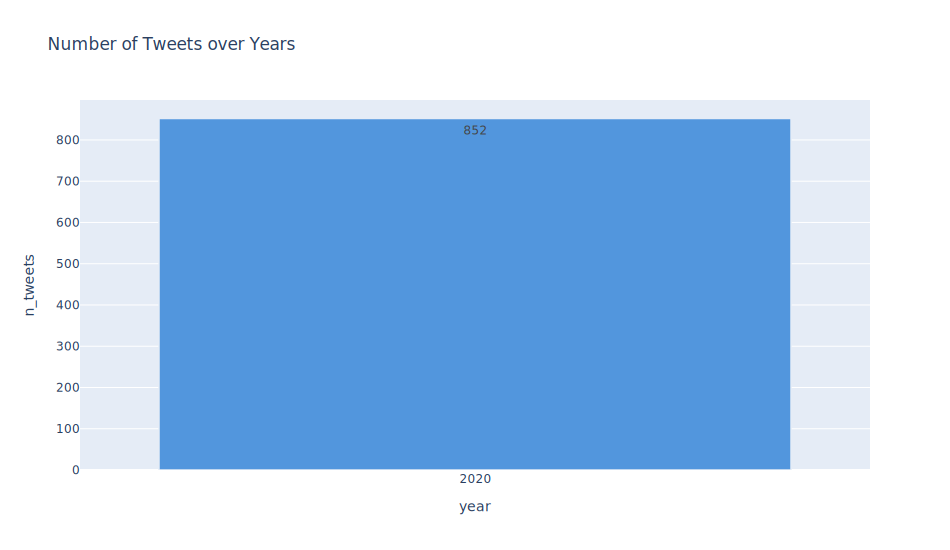

In [69]:
helpers.bar(df_years, "year", "n_tweets", "Number of Tweets over Years", text=0, margin=25000)

<a id='2020_days'></a>
>>### "Aquman Petition" Tweets Created in Each Day of Nov 2020
> <ul>
 <li><a href="#all_years">Total "Aquman Petition" Tweets (in this custer)</a></li>
 <li><a href="#2020_days"><b>Tweets Created in Each Day of Nov 2020</b></a></li>
 </ul>

**NOTE:**
- 2020 Peaks --> Feb, Nov

In [70]:
# helpers.facet_day_month(df_daily_20, "dayofmonth", "n_tweets", facet_on='month', n_col=4, year_str='2020')

In [71]:
df_daily = (
    df_creations.groupby(['date', 'year', 'month', 'dayofmonth']) 
    [['n_tweets', 'by_#accounts', '#created_accounts']].sum().reset_index()
)
df_daily.head(1)

,date,year,month,dayofmonth,n_tweets,by_#accounts,#created_accounts
0,2020-11-02,2020,Nov,2,3,3,0.0


In [72]:
df_peaks = df_daily.sort_values('n_tweets', ascending=False)
df_peaks.head(10)

,date,year,month,dayofmonth,n_tweets,by_#accounts,#created_accounts
11,2020-11-13,2020,Nov,13,145,139,1.0
10,2020-11-12,2020,Nov,12,122,97,1.0
26,2020-11-28,2020,Nov,28,84,81,0.0
27,2020-11-29,2020,Nov,29,69,68,0.0
6,2020-11-08,2020,Nov,8,45,21,0.0
25,2020-11-27,2020,Nov,27,44,43,0.0
12,2020-11-14,2020,Nov,14,38,38,1.0
9,2020-11-11,2020,Nov,11,37,27,0.0
5,2020-11-07,2020,Nov,7,36,36,2.0
28,2020-11-30,2020,Nov,30,30,27,0.0


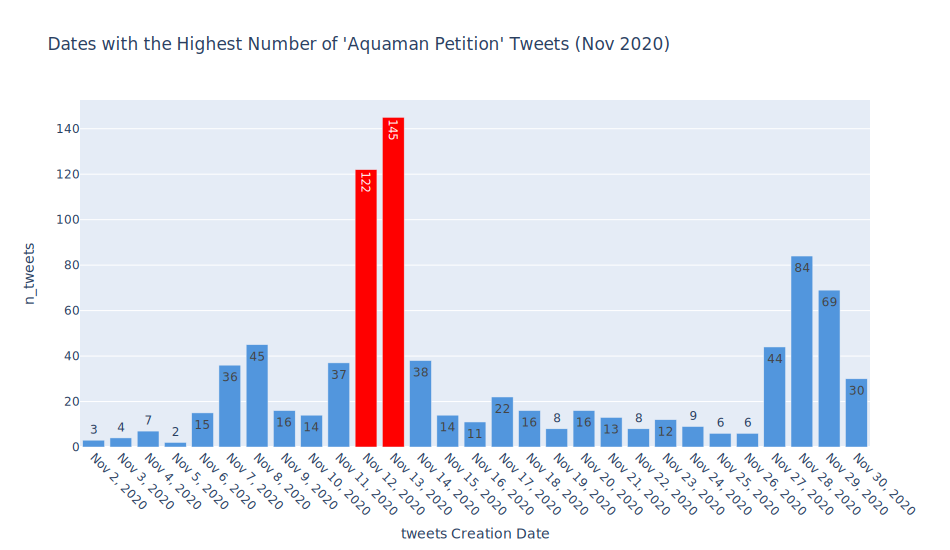

In [73]:
helpers.bar_peaks(df_peaks[['date', 'n_tweets']].head(30), "Dates with the Highest Number of 'Aquaman Petition' Tweets (Nov 2020)", threshold=100)


<a id='top_peaks'></a>
>## "Aquaman Petition" Tweets on Peaks
> <ul>
 <li><a href="#tweet_metrics">Tweets Metrics</a></li>
 <li><a href="#user_tweets">Users Tweets Metrics</a></li>  
    <li>------------------------------</li>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks"><b>Tweets on Peaks</b></a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
 <li><a href="#user_metrics">Users Metrics</a></li> 
 </ul>

<a id='top_dates'></a>
>>## "Aquaman Petition" Tweets on Peak Dates
> <ul>
 <li><a href="#top_dates"><b>Tweets on Peak Dates</b></a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
 </ul>

In [74]:
df_creations.head(1)

,date,year,month,dayofmonth,hour,n_tweets,by_#accounts,#created_accounts
0,2020-11-08,2020,Nov,8,2,21,1,NaN


### Peak Dates

In [75]:
df_peaks.head()

,date,year,month,dayofmonth,n_tweets,by_#accounts,#created_accounts
11,2020-11-13,2020,Nov,13,145,139,1.0
10,2020-11-12,2020,Nov,12,122,97,1.0
26,2020-11-28,2020,Nov,28,84,81,0.0
27,2020-11-29,2020,Nov,29,69,68,0.0
6,2020-11-08,2020,Nov,8,45,21,0.0


>>### 2020-11-13
>>- 272 Tweets with "Aquaman Petition Link"

In [76]:
aquaman_petition[aquaman_petition.date.astype(str) == "2020-11-13"]["text"].value_counts().head()

amber heard slams 'campaign' to remove her from aquaman 2 amid johnny depp drama\nhttps://t.co/arzitxkawm                              2
petition to fire amber heard from 'aquaman 2' hits 1 million https://t.co/uwlh6k8yxq yup ditch the lying bitch 😳                       1
breaking news: the petition to remove amber heard as mera in aquaman 2 has crossed 1 million signatures!\n\nhttps://t.co/fze8qhty6x    1
amber heard responds to calls for her removal from ‘aquaman 2’ https://t.co/y509b62vvb                                                 1
amber heard responds to calls for her removal from ‘aquaman 2’ https://t.co/dtldnjgmip                                                 1
Name: text, dtype: int64

In [77]:
aquaman_petition[aquaman_petition.date.astype(str) == "2020-11-13"]["username"].value_counts().head()

digiworldblog                                6
Support Johnny Depp ♡ Stream City of Lies    6
sweet_emmee/Emily♿️♻️                        3
V Media Network                              3
Mirror Celeb                                 3
Name: username, dtype: int64

>>### 2020-11-12
>>- 188 Tweets with "Aquaman Petition Link"

In [78]:
aquaman_petition[aquaman_petition.date.astype(str) == "2020-11-12"]["text"].value_counts().head()

fans petition for amber heard to be removed from aquaman 2\n\nhttps://t.co/njdlzvmeve                                                                                                                                                             2
#entertainment pirates of the caribbean johnny depp: 1 million fans want amber heard fired from aquaman 2 https://t.co/lfsypjzeph                                                                                                                 1
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/vewxfhnoau via @ukchange                                                                                                                                    1
so, the fan petition calling for warner bros to fire amber heard from aquaman 2 has now reached 1 million signatures. \n\n#aquaman #aquamanmovie #aquamancosplay #jasonmomoaaquaman #aquaman2018 #aquaman2 #amberheard https://t.co/lkkn0kej10    1
over 1️⃣ million people 

In [79]:
aquaman_petition[aquaman_petition.date.astype(str) == "2020-11-12"]["username"].value_counts().head()

Support Johnny Depp ♡ Stream City of Lies    27
Stephanie Brown                               7
Corrine Barraclough                           2
shalana barbour                               2
MMG News                                      2
Name: username, dtype: int64

<br>

### Users with The Most "Aquaman Petition" Contributions on Each Date

In [80]:
# Top 10 Commanted Users
aquaman_petition.username.value_counts().head(10)

Support Johnny Depp ♡ Stream City of Lies    100
Stephanie Brown                               62
Rohan Malviya                                 21
shalana barbour                               14
Rebecca                                        9
We Got This Covered                            7
Small Screen                                   7
Dale Cleary 🇬🇧                                 6
digiworldblog                                  6
URBANTIAN™                                     6
Name: username, dtype: int64

In [81]:
df = aquaman_petition.groupby(['date', 'username']).agg({'text':'count'}).reset_index(
).rename(columns={'text':'n_tweets'}).sort_values('n_tweets', ascending=False)

df.head(15)

,date,username,n_tweets
177,2020-11-12,Support Johnny Depp ♡ Stream City of Lies,27
67,2020-11-08,Rohan Malviya,21
108,2020-11-11,Support Johnny Depp ♡ Stream City of Lies,16
175,2020-11-12,Stephanie Brown,7
437,2020-11-23,Stephanie Brown,7
303,2020-11-13,digiworldblog,6
654,2020-11-30,Support Johnny Depp ♡ Stream City of Lies,6
280,2020-11-13,Support Johnny Depp ♡ Stream City of Lies,6
423,2020-11-21,Stephanie Brown,5
80,2020-11-09,Rebecca,5


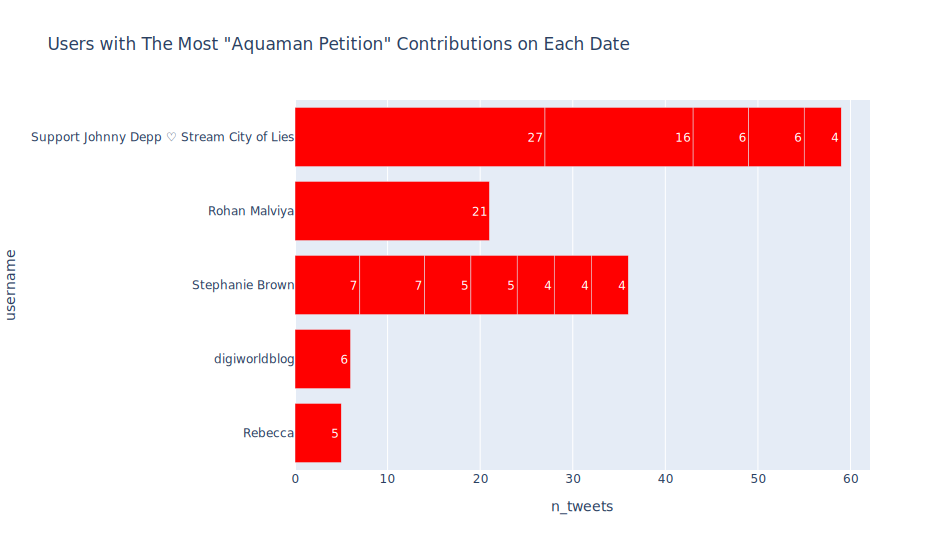

In [82]:
title = 'Users with The Most "Aquaman Petition" Contributions on Each Date'
helpers.barh(df[['username', 'n_tweets']].head(15), title, c='red') # , c=colors

### Support Johnny Depp ♡ Stream City of Lies	(2020-11-12)

In [83]:
mask = (aquaman_petition.date.astype(str)=="2020-11-12") \
& (aquaman_petition.username=="Support Johnny Depp ♡ Stream City of Lies")
support_johnny = aquaman_petition[mask]
support_johnny.text.value_counts()

petition to remove amber heard from aquaman 2 has over 900k signatures #justiceforjohnnydepp  https://t.co/es5zjnp9zf                                                                                                                                                                 1
"men are victims of domestic abuse, just like women. this must be recognized, and action must be taken to prevent a known abuser from being celebrated within the entertainment industry."\n\npetition to fire amber heard from 'aquaman 2' hits 1 million https://t.co/edkevyrjen    1
@comicbooknow remove amber heard from aquaman 2\n#boycottaquaman2 #boycottwarnerbros #fireamberheard #amberheardisanabuser https://t.co/isnbnz7d3z                                                                                                                                    1
@comicbook remove amber heard from aquaman 2\n#boycottaquaman2 #boycottwarnerbros #fireamberheard #amberheardisanabuser https://t.co/isnbnz7d3z                 

In [84]:
counts_per_hr = support_johnny.groupby('hour').size().reset_index(name='n_tweets')
counts_per_hr.head()

,hour,n_tweets
0,0,1
1,2,1
2,15,2
3,17,8
4,18,2


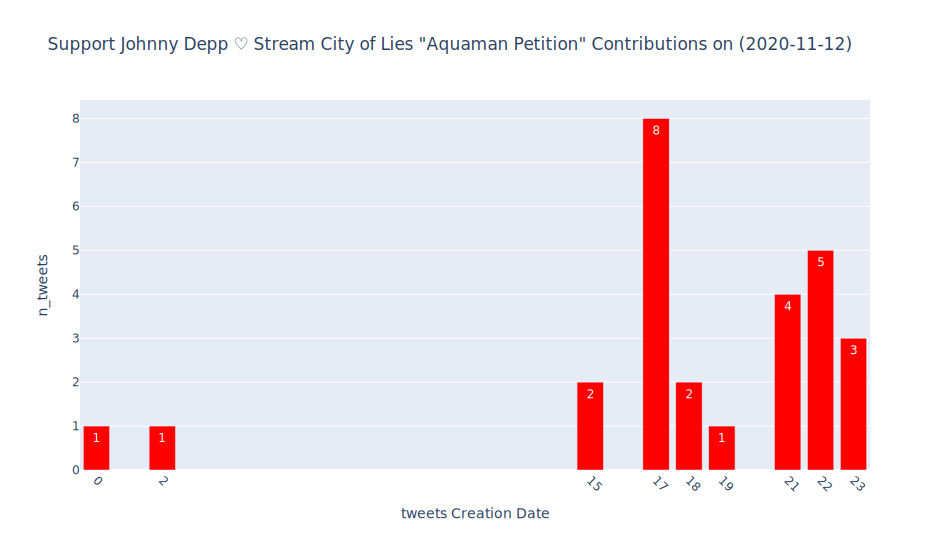

In [85]:
title = 'Support Johnny Depp ♡ Stream City of Lies "Aquaman Petition" Contributions on (2020-11-12)'
helpers.bar_peaks(counts_per_hr, title, threshold=0) 

---

<a id='top_hours'></a>
>>## "Aquaman Petition" Tweets on Peak Hours
> <ul>
 <li><a href="#top_dates">Tweets on Peak Dates</a></li> 
 <li><a href="#top_hours"><b>Tweets on Peak Hours</b></a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
 </ul>

In [86]:
aquaman_petition.head(1)

,text,n_followers,n_statuses,user_url,username,created_at,user_created_at,user_id,lang,profile_banner_url,user_description,profile_image_url,user_screen_name,user_location,n_friends,tweet_id,is_verified,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_retweets
683,dc entertainment: remove amber heard from aqua...,2408,80366,None,shalana barbour,2020-11-02 15:33:10,2009-11-07 10:15:40,88158868,en,https://pbs.twimg.com/profile_banners/88158868...,"love wrestling (WWE) bsb, john cena and watchi...",http://pbs.twimg.com/profile_images/1380093529...,bsbfan558,🇺🇸🏴‍☠️#JusticeForJohnnyDepp,4597,1323287041493274624,False,2020-11-02,2020,Nov,2,15,4013 days 05:17:30,4013,05:17:30,0.0,0.0,0.0,0.0,0.0


In [87]:
df_creations.head(1)

,date,year,month,dayofmonth,hour,n_tweets,by_#accounts,#created_accounts
0,2020-11-08,2020,Nov,8,2,21,1,NaN


In [88]:
df_peak_hrs = df_creations.groupby(['date', 'hour'])[['n_tweets','by_#accounts']].sum().reset_index(
).rename(columns={'text':'n_tweets'}).sort_values('n_tweets', ascending=False)

df_peak_hrs.head(15)

,date,hour,n_tweets,by_#accounts
42,2020-11-08,2,21,1
124,2020-11-13,13,15,15
264,2020-11-27,21,13,13
104,2020-11-12,17,13,5
109,2020-11-12,22,13,9
123,2020-11-13,12,12,11
111,2020-11-13,0,12,12
105,2020-11-12,18,11,8
110,2020-11-12,23,10,7
108,2020-11-12,21,10,7


### Users with The Most Tweets on the same hour

In [89]:
df = aquaman_petition.groupby(['date', 'hour', 'username']).agg({'text':'count'}).reset_index(
).rename(columns={'text':'n_tweets'}).sort_values('n_tweets', ascending=False)

print(df.shape)
df.head(15)

(756, 4)


,date,hour,username,n_tweets
68,2020-11-08,2,Rohan Malviya,21
198,2020-11-12,17,Support Johnny Depp ♡ Stream City of Lies,8
512,2020-11-23,3,Stephanie Brown,5
123,2020-11-11,17,Support Johnny Depp ♡ Stream City of Lies,5
118,2020-11-11,13,Support Johnny Depp ♡ Stream City of Lies,5
227,2020-11-12,22,Support Johnny Depp ♡ Stream City of Lies,5
490,2020-11-20,21,BellaItaliaGyrl,4
83,2020-11-08,23,Stephanie Brown,4
216,2020-11-12,21,Support Johnny Depp ♡ Stream City of Lies,4
741,2020-11-30,18,Support Johnny Depp ♡ Stream City of Lies,3


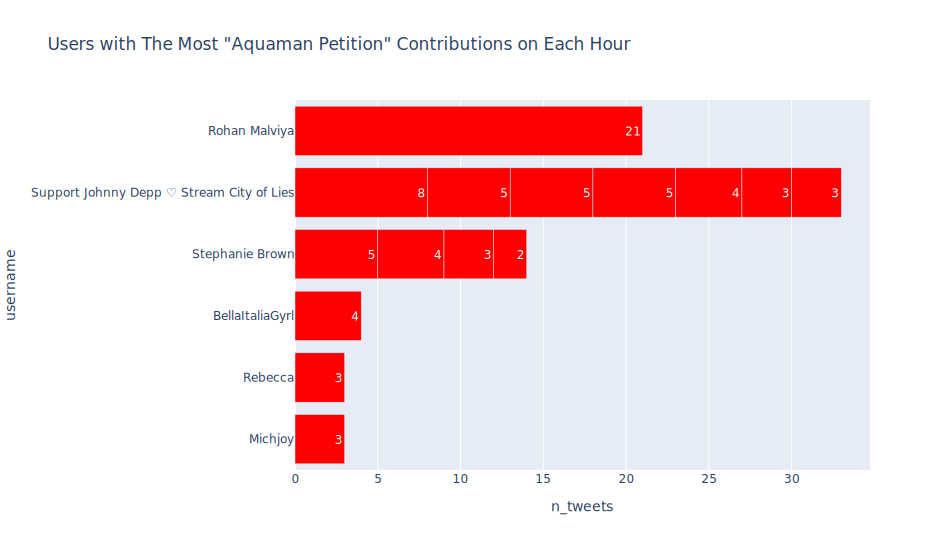

In [90]:
title = 'Users with The Most "Aquaman Petition" Contributions on Each Hour'
helpers.barh(df[['username', 'n_tweets']].head(15), title, c='red') # , c=colors

> ### <font color='red'>Fercho⚡ and Rohan Malviya</font>
>- Both Accounts tweeted more than 20 tweets on the exact same hour (2:00 am), but different days!! 

> ### <font color='red'>Support Johnny Depp ♡ Stream City of Lies</font>
(Who Tweeted more than Once on the same Second!!)
>- Tweeted (7, 9) tweets on (2020-11-11, 2020-11-12) on the exact same hour (17)

### Fercho⚡ (25) "Aquaman Petition" Tweets (2020-11-16) on the same hour (2:00 am)

In [91]:
mask = (aquaman_petition.date.astype(str)=="2020-11-16") \
& (aquaman_petition.username=="Fercho⚡")
Fercho = aquaman_petition[mask]
Fercho.text.value_counts()

Series([], Name: text, dtype: int64)

<br>

### Rohan Malviya (21) "Aquaman Petition" Tweets (2020-11-08) on the same hour (2:00 am)

In [92]:
mask = (aquaman_petition.date.astype(str)=="2020-11-08") \
& (aquaman_petition.username=="Rohan Malviya")
Rohan = aquaman_petition[mask]
Rohan.text.value_counts()

@anehansen7 @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                      2
@realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                                  1
@thedeppfan @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                      1
@guyfawkesreveng @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                 1
@x_alyssag @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                       1
@denisseheillen @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                  1
@razcrblade @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                      1
@garciamar5557 @realamberheard https://t.co/pj50xcmocy\n\nspre

---

<a id='top_times'></a>
>>## "Aquaman Petition" Tweets on Peak Times
> <ul>
 <li><a href="#top_dates">Tweets on Peak Dates</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times"><b>Tweets on Peak Times</b></a></li> 
 </ul>

In [93]:
df_peak_times = aquaman_petition.groupby('created_at').count()['text'].reset_index(name='n_tweets')\
.sort_values('n_tweets', ascending=False)

df_peak_times.head()

,created_at,n_tweets
179,2020-11-12 00:28:17,2
98,2020-11-08 18:38:57,2
301,2020-11-13 00:11:05,2
0,2020-11-02 15:33:10,1
570,2020-11-21 03:37:23,1


In [94]:
df = aquaman_petition.groupby(['created_at', 'username']).agg({'text':'count'}).reset_index(
).rename(columns={'text':'n_tweets'}).sort_values('n_tweets', ascending=False)

df = df[df.n_tweets > 1]

print(f'Unique number of users: {df.username.nunique()}')
print(f'Total number of Tweets: {df.n_tweets.sum()}')
df.head(15)

Unique number of users: 1
Total number of Tweets: 2


,created_at,username,n_tweets
98,2020-11-08 18:38:57,Support Johnny Depp ♡ Stream City of Lies,2


>### <font color='red'>One User Tweeted more than Once on the same Second!!</font>

In [95]:
aquaman_petition.duplicated().sum()

0

In [96]:
aquaman_petition[aquaman_petition.created_at.astype(str) == "2020-11-08 18:38:57"]

,text,n_followers,n_statuses,user_url,username,created_at,user_created_at,user_id,lang,profile_banner_url,user_description,profile_image_url,user_screen_name,user_location,n_friends,tweet_id,is_verified,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_retweets
2423,petitions to sign to help johnny depp 👑🫂❤️#jus...,15612,203833,https://t.co/0rDo6do7uU,Support Johnny Depp ♡ Stream City of Lies,2020-11-08 18:38:57,2015-12-23 23:22:52,4583281223,en,https://pbs.twimg.com/profile_banners/45832812...,♡ Depphead\n♡ @hollywoodvamps\n♡ @minamatafilm...,http://pbs.twimg.com/profile_images/1368268947...,MyGrindelwald,Flanders,273,1325508119129190402,False,2020-11-08,2020,Nov,8,18,1781 days 19:16:05,1781,19:16:05,25.0,2.0,104.0,6.0,31.0
2422,remove amber heard from aquaman 2\nhttps://t.c...,15612,203833,https://t.co/0rDo6do7uU,Support Johnny Depp ♡ Stream City of Lies,2020-11-08 18:38:57,2015-12-23 23:22:52,4583281223,en,https://pbs.twimg.com/profile_banners/45832812...,♡ Depphead\n♡ @hollywoodvamps\n♡ @minamatafilm...,http://pbs.twimg.com/profile_images/1368268947...,MyGrindelwald,Flanders,273,1325508122983718915,False,2020-11-08,2020,Nov,8,18,1781 days 19:16:05,1781,19:16:05,4.0,1.0,29.0,2.0,6.0


In [97]:
aquaman_petition[aquaman_petition.created_at.astype(str) == "2020-11-08 18:38:57"].tweet_id.value_counts()

1325508119129190402    1
1325508122983718915    1
Name: tweet_id, dtype: int64

In [98]:
print('\nIdentical Tweets data except for the created petition link\n')
aquaman_petition[aquaman_petition.created_at.astype(str) == "2020-11-08 18:38:57"].text.value_counts()


Identical Tweets data except for the created petition link



petitions to sign to help johnny depp 👑🫂❤️#justiceforjohnnydepp \n\na thread: \n\nwarner bros, bring johnny depp back as gellert grindelwald!!!\nhttps://t.co/elazu19brk    1
remove amber heard from aquaman 2\nhttps://t.co/isnbnz7d3z                                                                                                                  1
Name: text, dtype: int64

---

<a id='top_Tweets'></a>
>## Most Repeated Tweets (In Cluster 1 - Nov)
> <ul>
 <li><a href="#tweet_metrics">Tweets Metrics</a></li>
 <li><a href="#user_tweets">Users Tweets Metrics</a></li>  
    <li>------------------------------</li>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peaks</a></li>
 <li><a href="#top_Tweets"><b>Most Repeated Tweets</b></a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
 <li><a href="#user_metrics">Users Metrics</a></li> 
 </ul>

In [99]:
aquaman_petition.text.value_counts().head(30)

petition to remove amber heard from aquaman 2 crosses million-signature mark https://t.co/rekro8qsjw                                                                                                                                                                                        2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/xaz2gzxauh via @change                                                                                                                                                                                2
fans petition for amber heard to be removed from aquaman 2\n\nhttps://t.co/njdlzvmeve                                                                                                                                                                                                       2
@anehansen7 @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                                

<a id='same'></a>
>## Same Text Same Date (In Cluster 1 - Nov)
> <ul>
 <li><a href="#tweet_metrics">Tweets Metrics</a></li>
 <li><a href="#user_tweets">Users Tweets Metrics</a></li>  
    <li>------------------------------</li>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peaks</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same"><b>Same Text Same Date</b></a></li>
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
 <li><a href="#user_metrics">Users Metrics</a></li> 
 </ul>

In [100]:
aquaman_petition.head(1)

,text,n_followers,n_statuses,user_url,username,created_at,user_created_at,user_id,lang,profile_banner_url,user_description,profile_image_url,user_screen_name,user_location,n_friends,tweet_id,is_verified,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_retweets
683,dc entertainment: remove amber heard from aqua...,2408,80366,None,shalana barbour,2020-11-02 15:33:10,2009-11-07 10:15:40,88158868,en,https://pbs.twimg.com/profile_banners/88158868...,"love wrestling (WWE) bsb, john cena and watchi...",http://pbs.twimg.com/profile_images/1380093529...,bsbfan558,🇺🇸🏴‍☠️#JusticeForJohnnyDepp,4597,1323287041493274624,False,2020-11-02,2020,Nov,2,15,4013 days 05:17:30,4013,05:17:30,0.0,0.0,0.0,0.0,0.0


In [101]:
# print('\nThe Amplifications in the counts and number of likes on #justiceforjohnnydepp is quite obvious!!')
df_same = aquaman_petition.groupby(["text", "date", 'username']).agg({'tweet_id':'count', 'user_id': 'nunique'}).reset_index()
df_same.rename(columns={'tweet_id': 'n_tweets', 'user_id':'by_#accounts'}, inplace=True) 
df_same.sort_values(["n_tweets", 'date'], ascending=[False, True], inplace=True)

with pd.option_context('display.max_colwidth', None):
    display(df_same.head(15))

,text,date,username,n_tweets,by_#accounts
402,dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/xaz2gzxauh via @change,2020-11-03,shalana barbour,2,1
71,@anehansen7 @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2,2020-11-08,Rohan Malviya,2,1
333,dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/bi9ivr3jhn via @change,2020-11-11,mystical 😷,2,1
424,fans petition for amber heard to be removed from aquaman 2\n\nhttps://t.co/njdlzvmeve,2020-11-12,MRA_2018,2,1
228,amber heard slams 'campaign' to remove her from aquaman 2 amid johnny depp drama\nhttps://t.co/arzitxkawm,2020-11-13,Mirror Celeb,2,1
686,petition to remove amber heard from aquaman 2 crosses million-signature mark https://t.co/rekro8qsjw,2020-11-14,Chris Yanke,2,1
326,dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/8zwyr5o3pl via @ukchange,2020-11-02,katie power,1,1
399,dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/wcdkvz8jpm via @change,2020-11-02,shalana barbour,1,1
819,we're almost done! i have signed another!\ndc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/jvt6texrkx via @change,2020-11-02,Stephanie Brown,1,1
305,britain : justice nicol needs to be fired! justice for male da survivors! - sign the petition! #justiceforjohnnydepp #amberheardisaliar https://t.co/hwvy4ftgp4 via @change,2020-11-03,Anghel,1,1


---

<a id='new'></a>
> ## New Created Accounts
> <ul>
 <li><a href="#tweet_metrics">Tweets Metrics</a></li>
 <li><a href="#user_tweets">Users Tweets Metrics</a></li>  
    <li>------------------------------</li>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peaks</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#new"><b>New Created Accounts</b></a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
 <li><a href="#user_metrics">Users Metrics</a></li> 
 </ul>

### Accounts created in oct, nov 2020 and tweeted in this cluster

In [102]:
# Create a Daily creation dataframe for only the accounts created in oct, nov 2020
# and tweeted in this cluster

df_creations_20 = df_creations2[(df_creations2.year==2020)&(df_creations2.month.isin(['Oct','Nov']))].copy()
print(df_creations_20.shape)
df_creations_20.sort_values('#created_accounts', ascending=False).head(10)


(385, 8)


,date,year,month,dayofmonth,hour,n_tweets,by_#accounts,#created_accounts
333,2020-10-31,2020,Oct,31,22,NaN,NaN,2.0
344,2020-10-30,2020,Oct,30,22,NaN,NaN,2.0
136,2020-11-12,2020,Nov,12,1,2.0,2.0,1.0
876,2020-11-10,2020,Nov,10,6,NaN,NaN,1.0
881,2020-11-03,2020,Nov,3,23,NaN,NaN,1.0
880,2020-11-04,2020,Nov,4,9,NaN,NaN,1.0
879,2020-11-05,2020,Nov,5,18,NaN,NaN,1.0
878,2020-11-05,2020,Nov,5,23,NaN,NaN,1.0
877,2020-11-06,2020,Nov,6,1,NaN,NaN,1.0
874,2020-11-14,2020,Nov,14,23,NaN,NaN,1.0


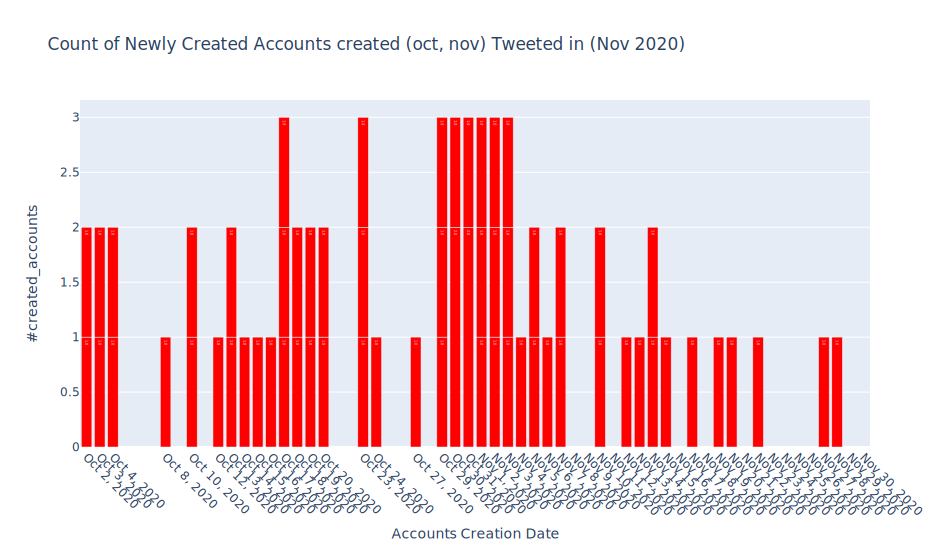

In [103]:
title = "Count of Newly Created Accounts created (oct, nov) Tweeted in (Nov 2020)"
helpers.bar_peaks(df_creations_20[['date', '#created_accounts']], title, threshold=0, xlabel='Accounts Creation Date')


### The tweets created by newly created accounts (oct, nov)

In [104]:
# n --> newly created accounts
tweets_n=tweets[(tweets['user_created_at'].dt.year==2020)&(tweets['user_created_at'].dt.month.isin([10,11]))]
print(tweets_n.shape)
tweets_n.text.value_counts().head()

(204, 30)


johnny depp axed from harry potter franchise after amber heard court case https://t.co/2qzvdyvtuk i guess we have to draw the line somewhere -- how outrageous does your personal life have to be to affect your profession?                                                    3
amber heard flies through air braless amid johnny depp victory https://t.co/nlh4kg8mwa                                                                                                                                                                                          2
with a little over 1.5 hours before the jd vs ngn ruling is made public #johnnydepp is trending.  here’s hoping he gets the justice he deserves and that advocates of dv organisations and movements take time to reflect on their bias towards women. #justiceforjohnnydepp    1
the way that so many little kids adore johnny depp and don’t even know who amber heard is😭😭 \n\nlmfao                                                                             

In [105]:
# Filter on Aquaman petition Links
tmp = tweets_n[tweets_n.text.str.contains('aquaman|petition')]
tmp = tmp[tmp.text.str.contains('http')]
print(tmp.shape)
tmp.text.value_counts().head(20)

(33, 30)


britain : justice nicol needs to be fired! justice for male da survivors! - sign the petition! #justiceforjohnnydepp #amberheardisaliar  https://t.co/hwvy4ftgp4 via @change                                                       1
replace amber heard with bryce dallas howard to play mera in aquaman 2... also give bryce her own star wars movie ❤ https://t.co/xt80nta0ww                                                                                        1
petition to axe amber heard from ‘aquaman 2’ snags upwards 1.5m signatures – deadline https://t.co/by1liugzah i’m sorry she needs to be cut from the movie she doesn’t deserve the role after doing what she did                   1
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/hr1l7amdsk via @change                                                                                                                       1
amber heard thinks johnny depp orchestrated a smear campaign to ruin her aquaman gig

In [106]:
df_peaks_n = tweets_n.groupby('date').size().reset_index(name='n_tweets')

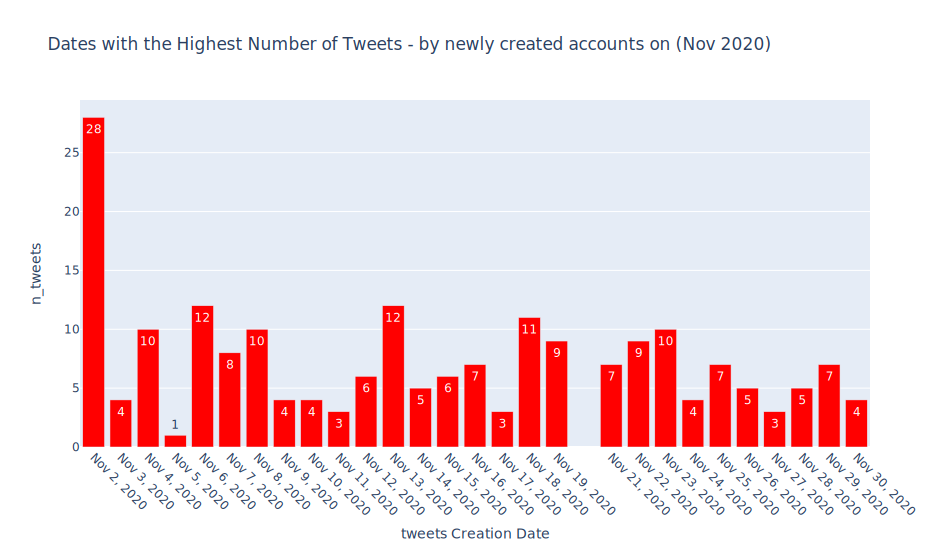

In [107]:
helpers.bar_peaks(df_peaks_n.head(30), "Dates with the Highest Number of Tweets - by newly created accounts on (Nov 2020)", threshold=0)

In [108]:
tweets_n[tweets_n['date'].astype(str) == "2020-11-02"]["text"].value_counts().head(30)

with a little over 1.5 hours before the jd vs ngn ruling is made public #johnnydepp is trending.  here’s hoping he gets the justice he deserves and that advocates of dv organisations and movements take time to reflect on their bias towards women. #justiceforjohnnydepp                 1
deeply disappointing. the poor guy was smeared and had his career ripped to shreds by that abusive shrew, aided by gutter media like this. listen to the widely available recordings yourself. #justiceforjohnnydepp https://t.co/kybuhnovsw                                                 1
@exposedefake #justiceforjohnnydepp #camisadosaopaulo #election2020 #curated_by_bts #bts_be #tomveiga #blastpremier #arsd ana maria braga biden you and i\n\ni'm voting for taylor swift for artist of the year at the #amas\n\nhttps://t.co/v9xvehgfuz                                      1
@pjmgalaxys antes\n\n#justiceforjohnnydepp #camisadosaopaulo #election2020 #curated_by_bts #bts_be #tomveiga #blastpremier #arsd ana maria 

---

<a id='unverified'></a>
> ## Exploring Unverified Accounts
> <ul>
 <li><a href="#tweet_metrics">Tweets Metrics</a></li>
 <li><a href="#user_tweets">Users Tweets Metrics</a></li>  
    <li>------------------------------</li>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peaks</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified"><b>Unverified Accounts</b></a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
 <li><a href="#user_metrics">Users Metrics</a></li> 
 </ul>

In [109]:
tweets.is_verified.value_counts()

False    4809
True      360
Name: is_verified, dtype: int64

In [110]:
aquaman_petition.is_verified.value_counts()

False    799
True      53
Name: is_verified, dtype: int64

> **NOTE:**
> - Most of the accounts are not verified

In [111]:
df_unverified = aquaman_petition.query(" is_verified == False ")
print(df_unverified.shape)
df_unverified.head()

(799, 30)


,text,n_followers,n_statuses,user_url,username,created_at,user_created_at,user_id,lang,profile_banner_url,user_description,profile_image_url,user_screen_name,user_location,n_friends,tweet_id,is_verified,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_retweets
683,dc entertainment: remove amber heard from aqua...,2408,80366,None,shalana barbour,2020-11-02 15:33:10,2009-11-07 10:15:40,88158868,en,https://pbs.twimg.com/profile_banners/88158868...,"love wrestling (WWE) bsb, john cena and watchi...",http://pbs.twimg.com/profile_images/1380093529...,bsbfan558,🇺🇸🏴‍☠️#JusticeForJohnnyDepp,4597,1323287041493274624,False,2020-11-02,2020,Nov,2,15,4013 days 05:17:30,4013,05:17:30,0.0,0.0,0.0,0.0,0.0
977,we're almost done! i have signed another!\ndc ...,1999,37410,None,Stephanie Brown,2020-11-02 21:10:28,2018-08-10 18:50:13,1027990519769714688,en,https://pbs.twimg.com/profile_banners/10279905...,😇🎶🎶😀I Am A #MichaelJackson And #JohnnyDepp Fan...,http://pbs.twimg.com/profile_images/1371277785...,Stephan76215148,USA,5000,1323371923548626947,False,2020-11-02,2020,Nov,2,21,815 days 02:20:15,815,02:20:15,0.0,0.0,2.0,0.0,0.0
1016,dc entertainment: remove amber heard from aqua...,699,12440,None,katie power,2020-11-02 22:26:13,2010-05-02 18:28:07,139470328,en,https://pbs.twimg.com/profile_banners/13947032...,OH MY GOD,http://pbs.twimg.com/profile_images/1310010092...,KPnuts14,UK,1557,1323390988153425920,False,2020-11-02,2020,Nov,2,22,3837 days 03:58:06,3837,03:58:06,0.0,0.0,0.0,0.0,0.0
1131,britain : justice nicol needs to be fired! jus...,1,8,https://t.co/OK5jGajTS6,Anghel,2020-11-03 02:12:38,2020-10-14 06:17:54,1316261881405935616,en,https://pbs.twimg.com/profile_banners/13162618...,"I'm just a weird 20 year old who loves gaming,...",http://pbs.twimg.com/profile_images/1316270438...,AnghelStryker,"Missouri, USA",21,1323447966804463617,False,2020-11-03,2020,Nov,3,2,19 days 19:54:44,19,19:54:44,NaN,NaN,NaN,NaN,NaN
1163,dc entertainment: remove amber heard from aqua...,2408,80366,None,shalana barbour,2020-11-03 04:58:51,2009-11-07 10:15:40,88158868,en,https://pbs.twimg.com/profile_banners/88158868...,"love wrestling (WWE) bsb, john cena and watchi...",http://pbs.twimg.com/profile_images/1380093529...,bsbfan558,🇺🇸🏴‍☠️#JusticeForJohnnyDepp,4597,1323489796203802626,False,2020-11-03,2020,Nov,3,4,4013 days 18:43:11,4013,18:43:11,0.0,0.0,0.0,0.0,0.0


In [112]:
df_unverified.username.value_counts().head(15)

Support Johnny Depp ♡ Stream City of Lies    100
Stephanie Brown                               62
Rohan Malviya                                 21
shalana barbour                               14
Rebecca                                        9
Small Screen                                   7
We Got This Covered                            7
digiworldblog                                  6
Dale Cleary 🇬🇧                                 6
URBANTIAN™                                     6
sweet_emmee/Emily♿️♻️                          5
Andy Vermaut                                   5
NewsfeedsMedia                                 5
JB                                             5
Martina Vaira                                  5
Name: username, dtype: int64

In [113]:
df_unverified.text.value_counts().head(60)

dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/lsvf3buxe8 via @cdnchange                                                                                                                                                                                                     2
@anehansen7 @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                                                                                                                                                                                                      2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/xaz2gzxauh via @change                                                                                                                                                                                                        2
petition to remove amber heard from aquaman 2 crosses million-signatur

<br>

---

<a id='banned'></a>
>## Deleted or Banned Accounts 
> <ul>
 <li><a href="#tweet_metrics">Tweets Metrics</a></li>
 <li><a href="#user_tweets">Users Tweets Metrics</a></li>  
    <li>------------------------------</li>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peaks</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned"><b>Deleted or Banned</b></a></li>
 <li><a href="#default">Default Profile Image</a></li>
 <li><a href="#user_metrics">Users Metrics</a></li> 
 </ul>

### Check the NaNs in Usernames
The NaNs in username --> either means deleted or banned accounts

In [114]:
helpers.isnull(tweets)

The number of NaNs in text: 0
The number of NaNs in n_followers: 0
The number of NaNs in n_statuses: 0
The number of NaNs in user_url: 2041
The number of NaNs in username: 0
The number of NaNs in created_at: 0
The number of NaNs in user_created_at: 0
The number of NaNs in user_id: 0
The number of NaNs in lang: 0
The number of NaNs in profile_banner_url: 722
The number of NaNs in user_description: 0
The number of NaNs in profile_image_url: 0
The number of NaNs in user_screen_name: 0
The number of NaNs in user_location: 0
The number of NaNs in n_friends: 0
The number of NaNs in tweet_id: 0
The number of NaNs in is_verified: 0
The number of NaNs in date: 0
The number of NaNs in year: 0
The number of NaNs in month: 0
The number of NaNs in dayofmonth: 0
The number of NaNs in hour: 0
The number of NaNs in diff: 0
The number of NaNs in days_diff: 0
The number of NaNs in hours_diff: 0
The number of NaNs in retweet_count: 657
The number of NaNs in reply_count: 657
The number of NaNs in like_cou

In [115]:
tweets[pd.isnull(tweets.username)].head(60)

,text,n_followers,n_statuses,user_url,username,created_at,user_created_at,user_id,lang,profile_banner_url,user_description,profile_image_url,user_screen_name,user_location,n_friends,tweet_id,is_verified,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_retweets


In [116]:
tweets[pd.isnull(tweets.username)].text.value_counts().head(60)

Series([], Name: text, dtype: int64)

<br>

### Check the NaNs in user_url
The NaNs in user_url --> either means deleted or banned accounts

In [117]:
tweets[pd.isnull(tweets.user_url)].username.value_counts().head(10)

Stephanie Brown                                    130
Pork_ney                                            86
Annapurna 🇬🇧🏴‍☠️                                    40
Rebecca                                             31
ThatUmbrellaGuy (BOW to your PARASOL OVERLORDZ)     29
Laetitia                                            29
shalana barbour                                     28
Fercho⚡                                             25
Rohan Malviya                                       21
Tyree Webster 🇬🇧🇲🇲                                  20
Name: username, dtype: int64

In [118]:
tweets[pd.isnull(tweets.user_url)].user_location.value_counts().head(10)

                               784
USA                            132
United Kingdom                 106
UK                              42
Denmark                         31
Under Da Sea                    29
France                          29
🇺🇸🏴‍☠️#JusticeForJohnnyDepp     28
Earth                           23
Croydon, London                 20
Name: user_location, dtype: int64

In [119]:
print(tweets[pd.isnull(tweets.user_url)].shape)
tweets[pd.isnull(tweets.user_url)].head()

(2041, 30)


,text,n_followers,n_statuses,user_url,username,created_at,user_created_at,user_id,lang,profile_banner_url,user_description,profile_image_url,user_screen_name,user_location,n_friends,tweet_id,is_verified,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_retweets
3,check out life and style magazine khloe kardas...,844,369365,None,ImperialMerchnt,2020-11-01 00:47:20,2013-11-08 00:19:11,2181130993,en,None,,http://pbs.twimg.com/profile_images/9785968462...,ImperialMerchnt,,2973,1322701725204172806,False,2020-11-01,2020,Nov,1,0,2550 days 00:28:09,2550,00:28:09,0.0,0.0,0.0,0.0,0.0
5,"so my question is, if england just went into l...",2408,80366,None,shalana barbour,2020-11-01 02:53:51,2009-11-07 10:15:40,88158868,en,https://pbs.twimg.com/profile_banners/88158868...,"love wrestling (WWE) bsb, john cena and watchi...",http://pbs.twimg.com/profile_images/1380093529...,bsbfan558,🇺🇸🏴‍☠️#JusticeForJohnnyDepp,4597,1322733565205868550,False,2020-11-01,2020,Nov,1,2,4011 days 16:38:11,4011,16:38:11,0.0,1.0,4.0,0.0,0.0
6,amber heard in a black dress – goes to a book ...,271,27225,None,Celebrities Pictures,2020-11-01 04:11:02,2017-05-08 23:47:48,861729377007976448,en,https://pbs.twimg.com/profile_banners/86172937...,"Celebrity Style, Fashion, Clothes, Outfits, Ph...",http://pbs.twimg.com/profile_images/1273752974...,HqCelebpics2k9,"Chandigarh, India",92,1322752986377080833,False,2020-11-01,2020,Nov,1,4,1272 days 04:23:14,1272,04:23:14,0.0,0.0,0.0,0.0,0.0
8,amber heard in a plaid shirt walks her dog in ...,428,17137,None,Celebs' Pics,2020-11-01 04:58:21,2019-04-05 16:09:28,1114198374495006721,en,None,,http://pbs.twimg.com/profile_images/1266688022...,celebsinbikini8,,3012,1322764895289565186,False,2020-11-01,2020,Nov,1,4,575 days 12:48:53,575,12:48:53,NaN,NaN,NaN,NaN,NaN
9,thatumbrellaguy flagged after triggering amber...,0,6878,None,Raja-Ulat #SupportHorikoshi,2020-11-01 05:14:20,2020-02-13 14:33:12,1227963910021476352,en,None,I like anime and manga and I hate woke/cancel ...,http://abs.twimg.com/sticky/default_profile_im...,RajaUlat,,17,1322768919657000960,False,2020-11-01,2020,Nov,1,5,261 days 14:41:08,261,14:41:08,0.0,0.0,0.0,0.0,0.0


In [120]:
tweets[pd.isnull(tweets.user_url)].text.value_counts().head(60)

amber heard in a plaid shirt walks her dog in los feliz 10/25/2020 https://t.co/4u3lx1pe2b                                                                                                                                                                                                                                         4
this cannot and will not end like this.\n#justiceforjohnnydepp                                                                                                                                                                                                                                                                     4
amber heard in a black tee stops at gelson&amp;#8217;s to gets some grocery shopping done in los feliz 10/31/2020 https://t.co/bepkv37ekw                                                                                                                                                                                          4
@wbpictures @hbomax warne

<br>

---

<a id='default'></a>
>## Accounts with Default Profile Image
> <ul>
 <li><a href="#tweet_metrics">Tweets Metrics</a></li>
 <li><a href="#user_tweets">Users Tweets Metrics</a></li>  
    <li>------------------------------</li>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peaks</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default"><b>Default Profile Image</b></a></li>
 <li><a href="#user_metrics">Users Metrics</a></li> 
 </ul>

### Users with the same profile image (the default image)

In [121]:
users['profile_image_url'].value_counts().head()

http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png    56
http://pbs.twimg.com/profile_images/26169952/wss6_normal.gif                      1
http://pbs.twimg.com/profile_images/932747580542472192/QJr4Jfj-_normal.jpg        1
http://pbs.twimg.com/profile_images/1374209958481436673/jXFG70LQ_normal.jpg       1
http://pbs.twimg.com/profile_images/1378269710362480640/LxbGutyx_normal.png       1
Name: profile_image_url, dtype: int64

In [122]:
image = "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png"
default_image = tweets[tweets['profile_image_url'] == image]
print(default_image.shape)
default_image.head()

(132, 30)


,text,n_followers,n_statuses,user_url,username,created_at,user_created_at,user_id,lang,profile_banner_url,user_description,profile_image_url,user_screen_name,user_location,n_friends,tweet_id,is_verified,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_retweets
9,thatumbrellaguy flagged after triggering amber...,0,6878,None,Raja-Ulat #SupportHorikoshi,2020-11-01 05:14:20,2020-02-13 14:33:12,1227963910021476352,en,None,I like anime and manga and I hate woke/cancel ...,http://abs.twimg.com/sticky/default_profile_im...,RajaUlat,,17,1322768919657000960,False,2020-11-01,2020,Nov,1,5,261 days 14:41:08,261,14:41:08,0.0,0.0,0.0,0.0,0.0
106,hollywood star loses bitter high court libel t...,53,31207,None,Daily Mail Breaking,2020-11-02 10:15:03,2017-01-31 16:24:16,826466136644521986,en,None,,http://abs.twimg.com/sticky/default_profile_im...,DM_breakingnews,,21,1323206983999197185,False,2020-11-02,2020,Nov,2,10,1370 days 17:50:47,1370,17:50:47,NaN,NaN,NaN,NaN,NaN
180,you expect no different in feminist britain. t...,37,17163,None,trevor harris,2020-11-02 10:38:42,2013-11-21 09:44:21,2189697473,en,None,,http://abs.twimg.com/sticky/default_profile_im...,trevfromtheyard,,295,1323212935246815232,False,2020-11-02,2020,Nov,2,10,2538 days 00:54:21,2538,00:54:21,0.0,0.0,0.0,0.0,0.0
196,johnny depp beat ex amber heard 12 times\nhttp...,45,38132,None,Michjoy,2020-11-02 10:45:45,2012-05-23 22:43:30,588717249,en,None,https://t.co/SoSTYTZzmc,http://abs.twimg.com/sticky/default_profile_im...,MrMichjoy,,113,1323214708120440833,False,2020-11-02,2020,Nov,2,10,3084 days 12:02:15,3084,12:02:15,0.0,0.0,0.0,0.0,0.0
200,@romulholland @lisette_morelos @fatimatorre @b...,45,38132,None,Michjoy,2020-11-02 10:48:19,2012-05-23 22:43:30,588717249,en,None,https://t.co/SoSTYTZzmc,http://abs.twimg.com/sticky/default_profile_im...,MrMichjoy,,113,1323215353850331144,False,2020-11-02,2020,Nov,2,10,3084 days 12:04:49,3084,12:04:49,0.0,0.0,0.0,0.0,0.0


In [123]:
default_image.username.value_counts().head(10)

Rebecca                        31
Rohan Malviya                  21
Michjoy                         9
Raja-Ulat #SupportHorikoshi     7
A.k                             4
Daily Mail Breaking             3
Michèle Haudebourg              2
PETER HUANG                     2
ALAN EDWARDS                    2
Chris Rice                      2
Name: username, dtype: int64

In [124]:
default_image.user_location.value_counts().head(10)

                        84
Denmark                 31
Anstruther, Scotland     2
Kolkata, India           2
Los Angeles, CA          2
Martinez, GA             1
Dorset Uk                1
manukau, auckland        1
Here                     1
Canada                   1
Name: user_location, dtype: int64

In [125]:
tweets[tweets['username'] == 'Rebecca'].user_location.value_counts()

Denmark    31
Name: user_location, dtype: int64

In [126]:
users[users['user.name'] == 'Rebecca']

,Unnamed: 0,user.id_str,user.screen_name,user.name,user.created_at,user.location,user.followers_count,user.friends_count,user.statuses_count,profile_image_url,profile_banner_url
1579,234741,844857186597531653,LadyCrunchy,Rebecca,2017-03-23 10:23:44,Denmark,8,34,758,http://abs.twimg.com/sticky/default_profile_im...,NaN


In [127]:
tweets[tweets['username'] == 'Rohan Malviya'].user_location.value_counts()

    21
Name: user_location, dtype: int64

In [128]:
users[users['user.name'] == 'Rohan Malviya']

,Unnamed: 0,user.id_str,user.screen_name,user.name,user.created_at,user.location,user.followers_count,user.friends_count,user.statuses_count,profile_image_url,profile_banner_url
1343,196240,1231234473129234435,RohanMa60755217,Rohan Malviya,2020-02-22 15:09:30,NaN,1,10,226,http://abs.twimg.com/sticky/default_profile_im...,NaN


### Top accounts tweeted with "aquaman petition links" having the default profile image!

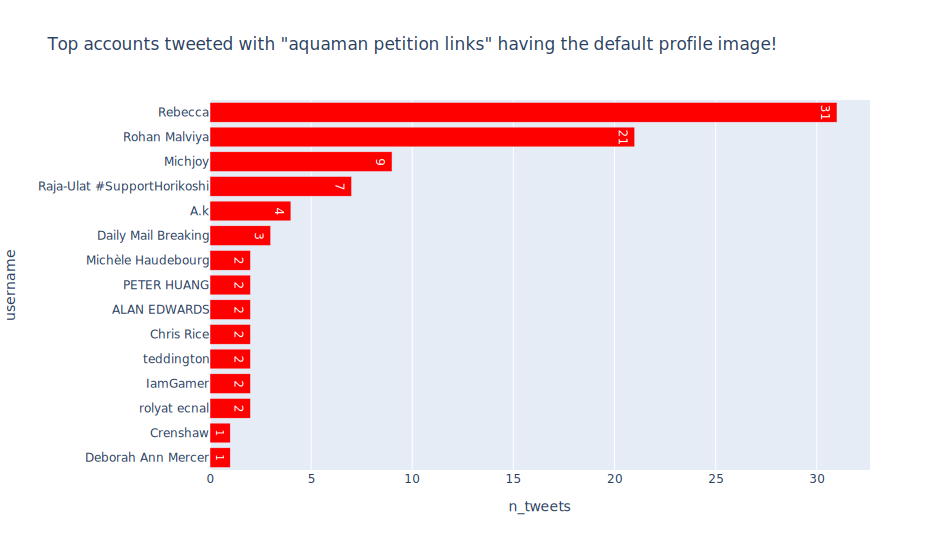

In [129]:
tmp = default_image.username.value_counts().reset_index().rename(columns={'index':'username', 'username':'n_tweets'})
title = 'Top accounts tweeted with "aquaman petition links" having the default profile image!'
helpers.barh(tmp.head(15), title, c='red')

## Rebecca


total number of tweets by "Rebecca": 31


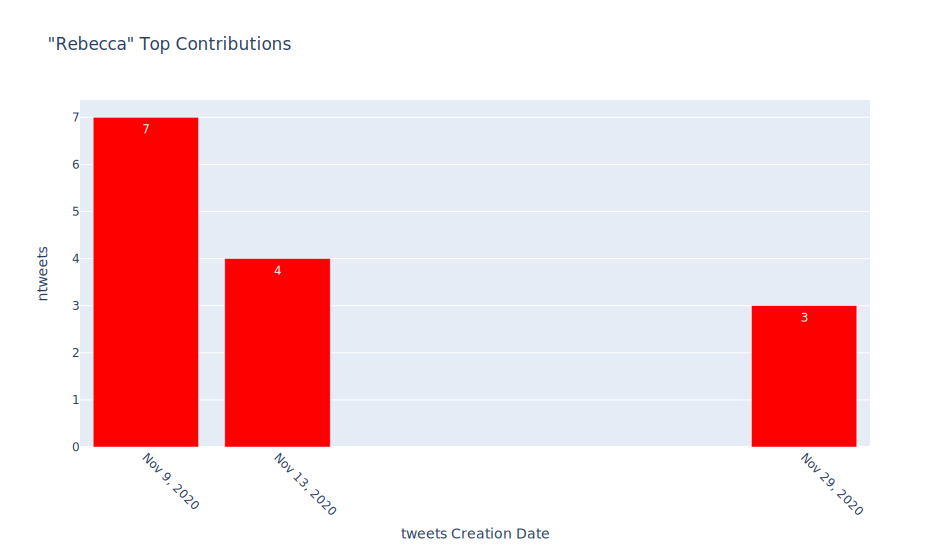

In [130]:
helpers.contr_peaks(tweets, "Rebecca", n=3, threshold=0)

In [131]:
tweets[tweets.username == 'Rebecca'].text.value_counts().head()

remove amber heard from aquaman 2                                                                                                                                                                                                                                                       1
#judelaw says the studio makes the big decisions, and he and others just go with that... great. you have no say, huh? you make the movie! get it? not the freaking company/studio.. without you (actors) there's no movie! #justiceforjohnnydepp                                        1
un-believable!!! #amberheardistherealabuser and is still the face of l'oreal and aclu... sign the petition below and rt!!!!\namerican civil liberties union: have amber heard removed as aclu ambassador for women's rights - sign the petition! https://t.co/f4voddtld8 via @change    1
#justiceforjohnnydepp. he deserves it!                                                                                                                    

<br>

## Rohan Malviya


total number of tweets by "Rohan Malviya": 21


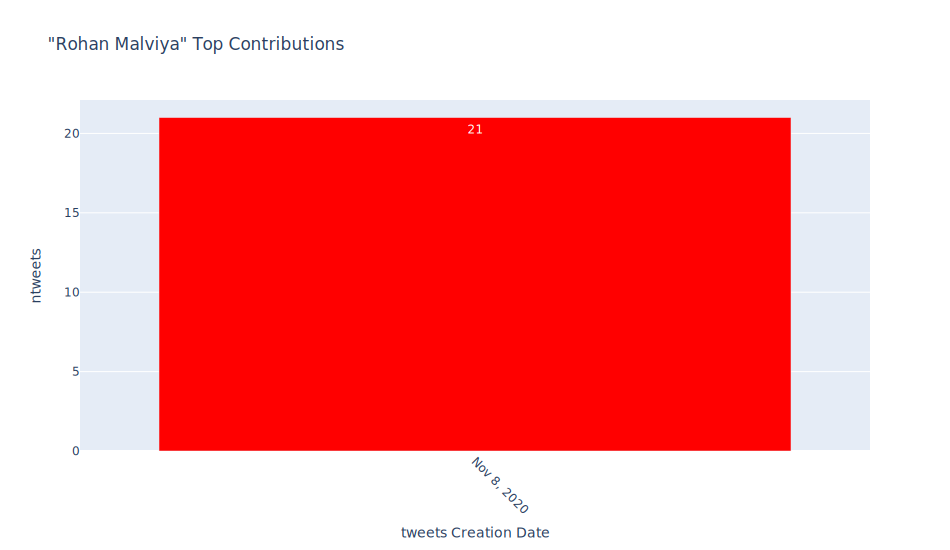

In [132]:
helpers.contr_peaks(tweets, "Rohan Malviya", n=3, threshold=0)

In [133]:
tweets[tweets.username == 'Rohan Malviya'].text.value_counts().head()

@anehansen7 @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2         2
@realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                     1
@thedeppfan @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2         1
@guyfawkesreveng @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2    1
@x_alyssag @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2          1
Name: text, dtype: int64

<br>

In [134]:
tweets[tweets['profile_image_url'] == image].text.value_counts().head(60)

amber heard flies through air braless amid johnny depp victory https://t.co/nlh4kg8mwa                                                                                                                                                                                                      2
just commented on @thejournal_ie: johnny depp resigns from fantastic beasts after ruling he assaulted amber heard - https://t.co/vy5thkst6u                                                                                                                                                 2
@anehansen7 @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                                                                                                                                                                              2
amber heard confirms role in %27aquaman 2,%27 criticizes %27paid campaigns%27 to remove her from ... https://t.co/kmu0fagysv via @yahoonews ❤❤

---

<a id='user_metrics'></a>
>## Users Metrics
> <ul>
 <li><a href="#tweet_metrics">Tweets Metrics</a></li>
 <li><a href="#user_tweets">Users Tweets Metrics</a></li>  
    <li>------------------------------</li>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peaks</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
 <li><a href="#user_metrics"><b>Users Metrics</b></a></li> 
 </ul>

<a id='top_Tweeted'></a>
>>## Top Tweeted Users with "Aquaman Petition Links"
> <ul>
 <li><a href="#top_Tweeted"><b>Top Tweeted Users</b></a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 </ul>

In [135]:
# df_top_users = (
#     aquaman_petition["username"]
#     .value_counts()
#     .to_frame()
#     .reset_index()
#     .rename(columns={"index": "username", "username": "n_tweets"})
# )

In [136]:
df_top_users = (
    aquaman_petition.groupby(['username', aquaman_petition.user_created_at.dt.date])
    .agg({'text':'count', 'n_friends': 'max', 'n_followers': 'max', 'n_statuses': 'max'})
    .reset_index().rename(columns={'text':'n_tweets'}).sort_values('n_tweets', ascending=False)
)

df_top_users.head(15)

,username,user_created_at,n_tweets,n_friends,n_followers,n_statuses
347,Support Johnny Depp ♡ Stream City of Lies,2015-12-23,100,273,15613,203893
338,Stephanie Brown,2018-08-10,62,5000,1999,37410
312,Rohan Malviya,2020-02-22,21,10,1,226
448,shalana barbour,2009-11-07,14,4597,2408,80366
303,Rebecca,2017-03-23,9,34,8,758
395,We Got This Covered,2010-06-28,7,23634,46239,160091
334,Small Screen,2016-12-07,7,1073,1997,6306
419,digiworldblog,2020-04-30,6,11,7,122847
79,Dale Cleary 🇬🇧,2014-03-26,6,3607,1971,41237
383,URBANTIAN™,2013-05-29,6,1698,10652,156658


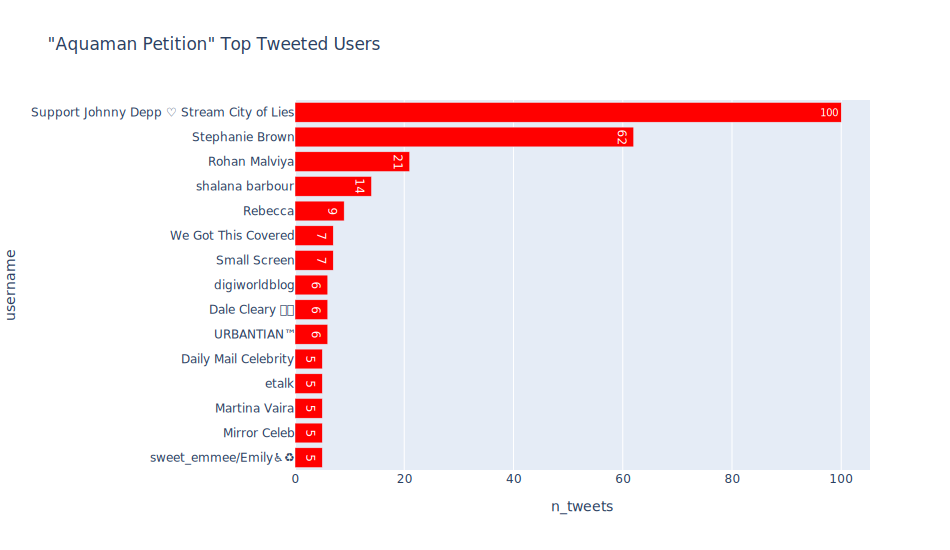

In [137]:
helpers.barh(df_top_users[['username', 'n_tweets']].head(15), '"Aquaman Petition" Top Tweeted Users', c='red') 

## Support Johnny Depp ♡ Stream City of Lies

In [138]:
# importlib.reload(helpers)


total number of tweets by "Support Johnny Depp ♡ Stream City of Lies": 892


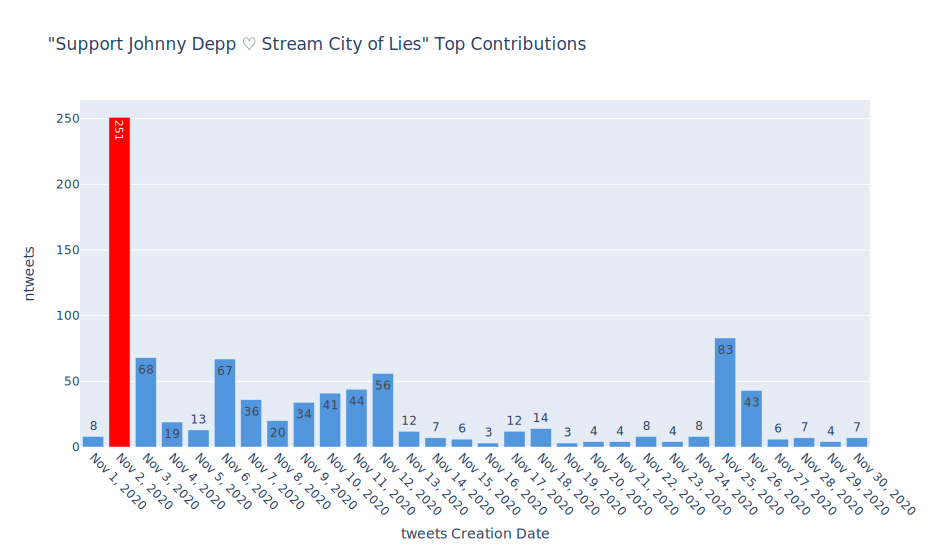

In [139]:
helpers.contr_peaks(tweets, "Support Johnny Depp ♡ Stream City of Lies", n=30, threshold=100)

In [140]:
tweets[tweets.username == "Support Johnny Depp ♡ Stream City of Lies"].text.value_counts().head(10)

@reuters he'll appeal https://t.co/i8i23dpz7q #justiceforjohnnydepp https://t.co/ga65j0ocuz                                               4
@skynews he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv                                    3
@independent he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv                                3
@guardian he'll appeal https://t.co/i8i23dpz7q #justiceforjohnnydepp https://t.co/ga65j0ocuz                                              3
@reuters he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv                                    2
@skynews he'll appeal https://t.co/i8i23dpz7q #justiceforjohnnydepp https://t.co/ga65j0ocuz                                               2
@filmnewsweb nicol gave depp until 7 december to apply directly to the court of appeal to overturn his judgment. #justiceforjohnnydepp    2
@comicbook_movie #bo

### Support Johnny Depp ♡ Stream City of Lies	(2020-11-02)

"Support Johnny Depp ♡ Stream City of Lies" tweeted (251) tweets on (2020-11-02)


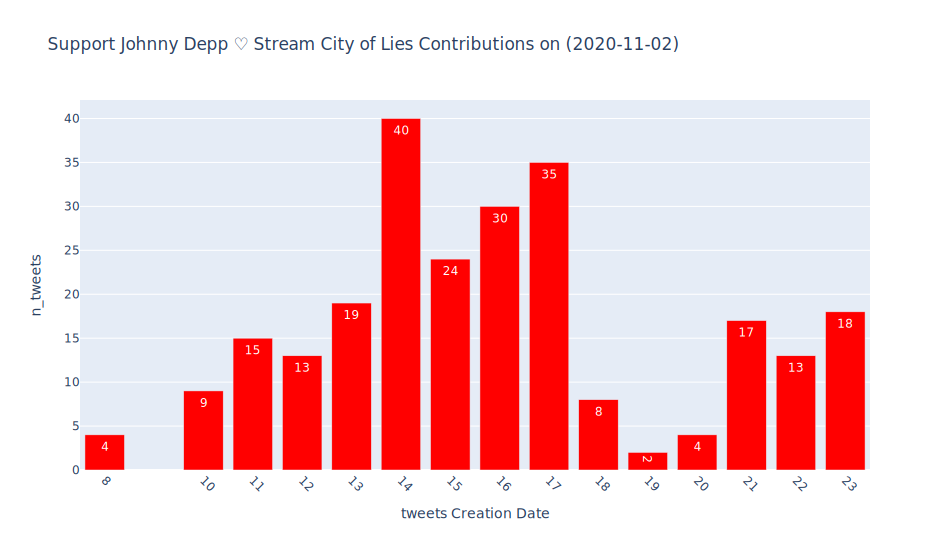

In [141]:
# Used the Tweets Data, Since text don't contain 'aquaman' or 'petition'
mask = (tweets.date.astype(str)=="2020-11-02") \
& (tweets.username=="Support Johnny Depp ♡ Stream City of Lies")
support_johnny = tweets[mask]

counts_per_hr = support_johnny.groupby('hour').size().reset_index(name='n_tweets')
print(f'"Support Johnny Depp ♡ Stream City of Lies" tweeted ({counts_per_hr.n_tweets.sum()}) tweets on (2020-11-02)')

title = 'Support Johnny Depp ♡ Stream City of Lies Contributions on (2020-11-02)'
helpers.bar_peaks(counts_per_hr, title, threshold=0) 

In [142]:
support_johnny.text.value_counts().head(30)

@independent he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv                                                                                           3
@skynews he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv                                                                                               3
@guardian he'll appeal https://t.co/i8i23dpz7q #justiceforjohnnydepp https://t.co/ga65j0ocuz                                                                                                         3
@reuters he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv                                                                                               2
@dailymailceleb he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv                                                                                        2
@skyn

<br>

## Stephanie Brown


total number of tweets by "Stephanie Brown": 130


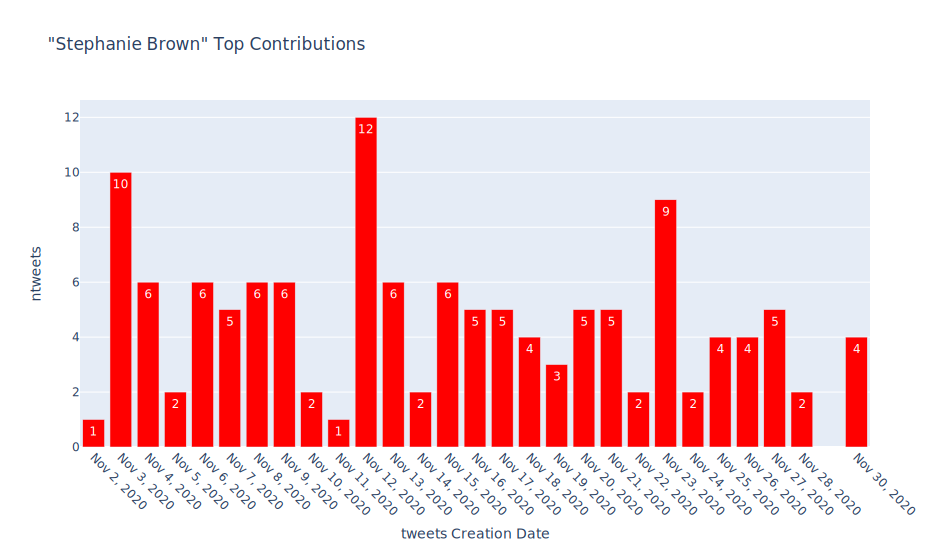

In [143]:
helpers.contr_peaks(tweets, "Stephanie Brown", n=30, threshold=0)

In [144]:
tweets[tweets.username == 'Stephanie Brown'].text.value_counts().head()

we're almost done! i have signed another!\ndc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/jvt6texrkx via @change                                                                                                             1
hey, everyone! look! i found another petition and signed it to get amber heard replaced by emilia clarke as mera! c'mon!!!\ndc comics: replace amber heard with emilia clarke as mera in aquaman 2 - sign the petition! https://t.co/0yv21kf5vj via @change         1
even through tears but with anger at the same time i have found another petition and signed it  to save johnny depp and defeat amber heard!\nwarner brothers: bring justice for actor johnny depp - sign the petition! https://t.co/qt1wrc2ise via @change          1
guess what, my friends? i signed another petition to get #justiceforjohnnydepp!\ndon't give up! pass it on!\nwarner bros. pictures: justice for depp - sign the petition! https://t.co/yqt5hf5pp6 via @change         

### Stephanie Brown	(2020-11-12)

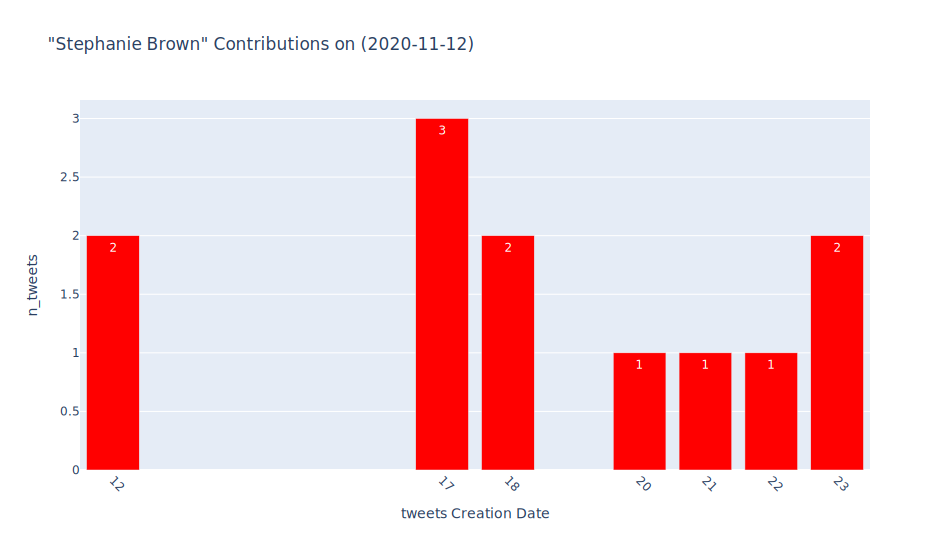

In [145]:
# Used the Tweets Data, Since text don't contain 'aquaman' or 'petition'
mask = (tweets.date.astype(str)=="2020-11-12") \
& (tweets.username=="Stephanie Brown")
Stephanie = tweets[mask]

counts_per_hr = Stephanie.groupby('hour').size().reset_index(name='n_tweets')
title = '"Stephanie Brown" Contributions on (2020-11-12)'
helpers.bar_peaks(counts_per_hr, title, threshold=0) 

In [146]:
Stephanie.text.value_counts()

#johnnydeppisinnocent #justiceforjohnnydepp\n"do you believe johnny depp is guilty of the abuse he's been accused of?" my choice was "no" https://t.co/tz2ksd6ko4                                                                                                                                    1
#justiceforjohnnydepp #youcantkeepagoodmandown #weloveyoujohnnydepp\n"do you think johnny depp would make a good ghost rider?" my choice was "yes" https://t.co/qrd452tfbt                                                                                                                           1
what do you guys think?\nsharon osbourne says amber heard 'gave as good as she got' after johnny depp's 'wife beater' libe... https://t.co/dpfedgfueh via @yahoonews                                                                                                                                 1
hey, everybody! i signed another petition to get amber heard fired and locked up in jail!\nunited states supreme co

<br>

## Rohan Malviya


total number of tweets by "Rohan Malviya": 21


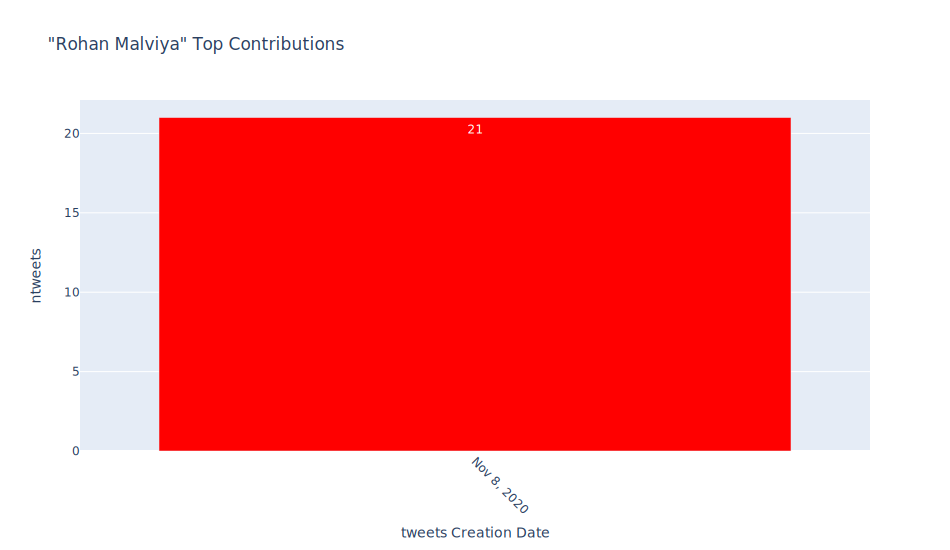

In [147]:
helpers.contr_peaks(tweets, "Rohan Malviya", n=30, threshold=10)

In [148]:
tweets[tweets.username == "Rohan Malviya"].text.value_counts()

@anehansen7 @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                      2
@realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                                  1
@thedeppfan @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                      1
@guyfawkesreveng @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                 1
@x_alyssag @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                       1
@denisseheillen @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                  1
@razcrblade @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                      1
@garciamar5557 @realamberheard https://t.co/pj50xcmocy\n\nspre

<br>

## Least Tweeted Accounts

In [149]:
# df_top_users.tail(15)

> **NOTE:**
> - No need to investigate more on the Least Tweeted Accounts with "Aquaman Petiton Links"

<br>

---

'n_statuses', 'n_followers', 'n_friends'

<a id='most_follow'></a>
>>## Users with the Most Followers
> <ul>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow"><b>Users with the Most Followers</b></a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 </ul>

In [150]:
aquaman_petition.head(1)

,text,n_followers,n_statuses,user_url,username,created_at,user_created_at,user_id,lang,profile_banner_url,user_description,profile_image_url,user_screen_name,user_location,n_friends,tweet_id,is_verified,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_retweets
683,dc entertainment: remove amber heard from aqua...,2408,80366,None,shalana barbour,2020-11-02 15:33:10,2009-11-07 10:15:40,88158868,en,https://pbs.twimg.com/profile_banners/88158868...,"love wrestling (WWE) bsb, john cena and watchi...",http://pbs.twimg.com/profile_images/1380093529...,bsbfan558,🇺🇸🏴‍☠️#JusticeForJohnnyDepp,4597,1323287041493274624,False,2020-11-02,2020,Nov,2,15,4013 days 05:17:30,4013,05:17:30,0.0,0.0,0.0,0.0,0.0


In [151]:
df_nfollow = (
    aquaman_petition.groupby(['username', aquaman_petition.user_created_at.dt.date])
    .agg({'n_followers': 'max', 'text':'count', 'n_statuses': 'max', 'n_friends': 'max'})
    .reset_index().rename(columns={'text':'n_tweets'}).sort_values('n_followers', ascending=False)
)

df_nfollow.head(15)

,username,user_created_at,n_followers,n_tweets,n_statuses,n_friends
370,The Independent,2008-10-26,3550010,4,1107950,671
85,Deadline Hollywood,2012-05-20,960957,2,171040,125126
270,Newsmax,2009-02-10,868009,1,111222,568
216,Manchester News MEN,2009-02-12,594978,1,272127,1413
115,Fandom,2007-03-17,396613,1,50128,44656
77,Daily Mail Celebrity,2010-02-05,333299,5,198620,955
10,ARISE News Feed,2013-01-14,283978,1,16330,1358
68,Comic Book Resources,2008-08-28,283859,2,190759,761
335,South Florida Sun Sentinel,2008-01-25,276843,1,182804,12102
374,TheWrap,2009-01-07,245064,2,220490,12198


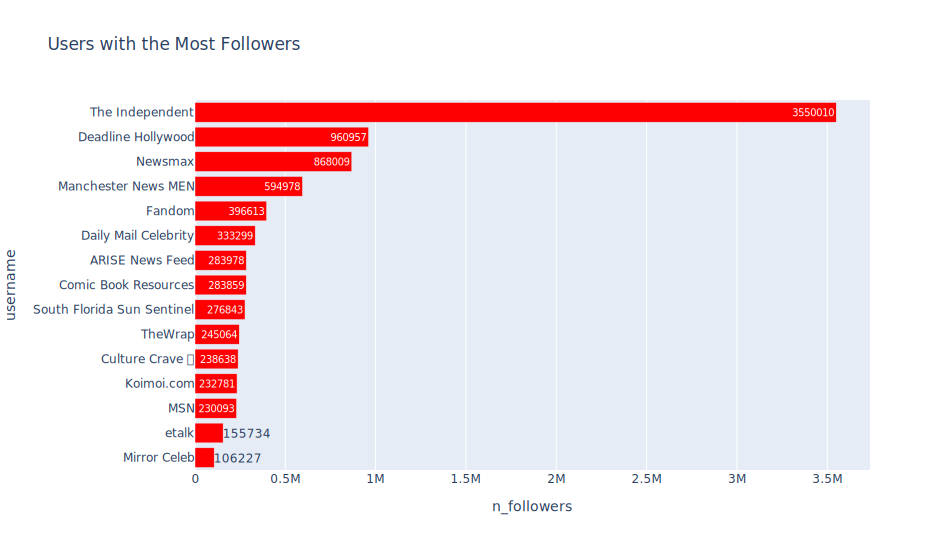

In [152]:
helpers.barh(df_nfollow[['username', 'n_followers']].head(15), "Users with the Most Followers", c='red') # c=colors

In [153]:
# tweets[tweets.username == 'People'].text.value_counts().head()

In [154]:
# helpers.contr_peaks(tweets, "People", n=30, threshold=0)

### Entertainment Weekly

In [155]:
# tweets[tweets.username == 'Entertainment Weekly'].text.value_counts().head()

In [156]:
# helpers.contr_peaks(tweets, "Entertainment Weekly", n=30, threshold=0)

<br>

## Users with the Least Followers

In [157]:
df_nfollow.tail(15)

,username,user_created_at,n_followers,n_tweets,n_statuses,n_friends
112,Evelyn Addams,2020-10-17,1,1,33,25
6,@moviesblogs,2020-10-12,1,1,5650,7
53,Cathal carolan,2016-07-11,1,1,111,131
56,Celeste Brochu,2016-03-26,1,1,32,12
312,Rohan Malviya,2020-02-22,1,21,226,10
450,sharpie 🐷,2019-09-01,1,1,106,46
260,News 24 Nation,2020-08-15,1,2,13897,0
178,Kathleen,2020-02-25,1,2,70,9
148,IamGamer,2019-03-19,1,1,70,377
22,Anghel,2020-10-14,1,2,8,21


> **NOTE:**
> - most of the accounts are newly created
> - "Rohan Malviya" is the second most tweeted account with "aquaman petition links" having the default profile image!

In [158]:
tweets[tweets.username == 'Rohan Malviya'].text.value_counts()

@anehansen7 @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                      2
@realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                                  1
@thedeppfan @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                      1
@guyfawkesreveng @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                 1
@x_alyssag @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                       1
@denisseheillen @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                  1
@razcrblade @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                      1
@garciamar5557 @realamberheard https://t.co/pj50xcmocy\n\nspre

<br>

---

'n_statuses', 'n_followers', 'n_friends'

<a id='most_frnds'></a>
>>## Users with the Most Friends
> <ul>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds"><b>Users with the Most Friends</b></a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 </ul>

In [159]:
df_nfrnds = (
    aquaman_petition.groupby(['username', aquaman_petition.user_created_at.dt.date])
    .agg({'n_friends': 'max', 'text':'count', 'n_statuses': 'max', 'n_followers': 'max'})
    .reset_index().rename(columns={'text':'n_tweets'}).sort_values('n_friends', ascending=False)
)

df_nfrnds.head(15)

,username,user_created_at,n_friends,n_tweets,n_statuses,n_followers
85,Deadline Hollywood,2012-05-20,125126,2,171040,960957
206,Lucas Wyrsch,2008-02-11,88893,1,725057,97068
342,Steven J Gross,2009-03-26,72196,1,38898,79606
381,Toxic Agenda,2013-01-11,60628,1,394604,62382
128,GeekFeed,2014-02-18,50656,1,16360,75510
115,Fandom,2007-03-17,44656,1,50128,396613
124,Flickering Myth,2009-10-10,34906,1,236851,56116
21,Andy Vermaut,2011-04-17,26628,5,1086304,30610
395,We Got This Covered,2010-06-28,23634,7,160091,46239
361,Tech Junkie,2015-02-27,22017,2,347407,28770


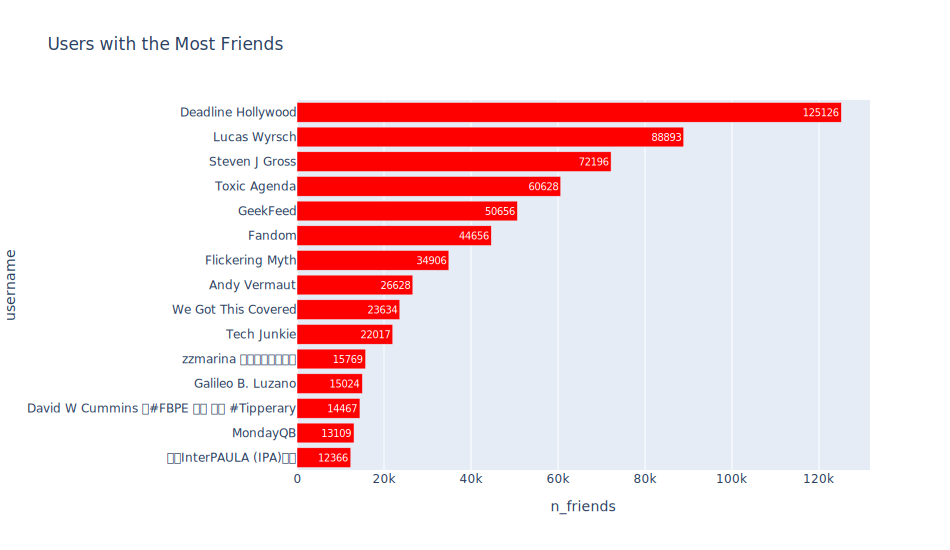

In [160]:
helpers.barh(df_nfrnds[['username', 'n_friends']].head(15), "Users with the Most Friends", c='red')

### Deadline Hollywood

In [161]:
tweets[tweets.username == 'Deadline Hollywood'].text.value_counts().head()

petition to axe amber heard from ‘aquaman 2’ receives upwards 1.5m signatures following johnny depp’s ‘fantastic beasts’ departure https://t.co/crzmrbxutt                     1
an online petition urging studio personnel to remove amber heard from the upcoming 'aquaman' sequel has received more than 1.5 million signatures.  https://t.co/qc1pkxcrho    1
Name: text, dtype: int64


total number of tweets by "Deadline Hollywood": 2


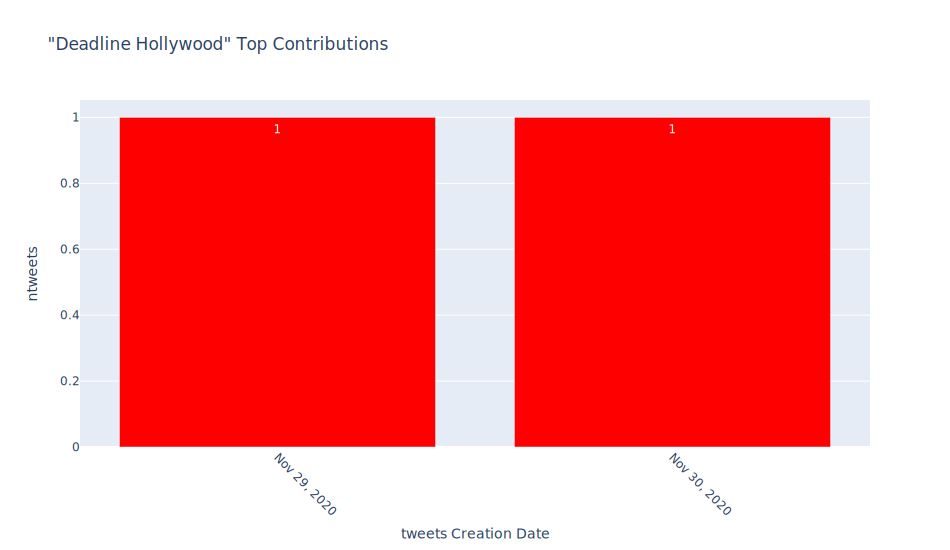

In [162]:
helpers.contr_peaks(tweets, "Deadline Hollywood", n=30, threshold=0)

<br>

## Users with the Least Friends

In [163]:
df_nfrnds.tail(15)

,username,user_created_at,n_friends,n_tweets,n_statuses,n_followers
380,Topstoriestoday,2020-04-18,0,1,36018,8
282,Onhike,2020-07-11,0,1,9591,1
278,NoSugarCoatingIt,2018-08-22,0,1,967,2
40,Breaking News Tv,2020-05-04,0,1,93860,7
144,Harry Norton,2015-12-23,0,1,64848,28
272,Newszada,2020-06-22,0,2,91083,18
398,While NEWS,2016-09-15,0,2,81450,33
260,News 24 Nation,2020-08-15,0,2,13897,1
254,MyCityBeat,2019-02-27,0,1,30304,47
248,Movie Review,2020-09-03,0,1,9740,1


> **NOTE:**
> - we can investigate more on Acoounts with the Least Friends too!!

<br>

<a id='most_status'></a>
>>## Users with the Most Statuses (Tweets + Retweets)
> <ul>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status"><b>Users with the Most Statuses</b></a></li>
 </ul>

In [164]:
df_nstatus = (
    aquaman_petition.groupby(['username', aquaman_petition.user_created_at.dt.date])
    .agg({'n_statuses': 'max', 'text':'count', 'n_followers': 'max', 'n_friends': 'max'})
    .reset_index().rename(columns={'text':'n_tweets'}).sort_values('n_statuses', ascending=False)
)

df_nstatus.head(15)

,username,user_created_at,n_statuses,n_tweets,n_followers,n_friends
297,PulpNews Crime,2010-01-01,3795161,1,4960,924
58,Charles Myrick -CEO,2009-06-21,1644336,1,1383,1860
406,Zyite.com,2014-06-03,1612812,1,1745,3666
370,The Independent,2008-10-26,1107950,4,3550010,671
21,Andy Vermaut,2011-04-17,1086304,5,30610,26628
132,Gina Lawriw,2014-06-04,1000229,1,9440,7057
169,Jenkers News (ENG),2015-03-19,925268,2,1292,240
90,Dennis Koch,2013-02-15,790274,1,7932,8440
206,Lucas Wyrsch,2008-02-11,725057,1,97068,88893
256,Naija Reports,2019-12-07,696007,1,277,47


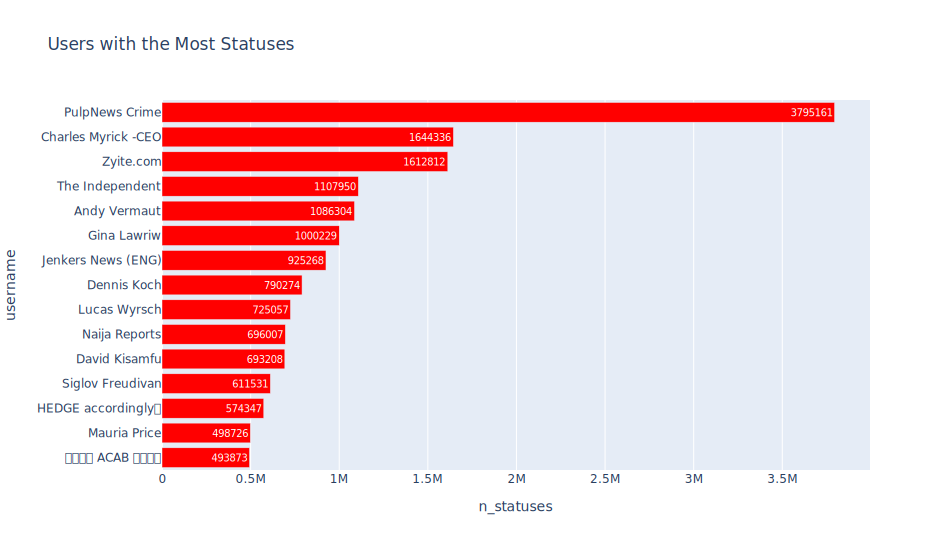

In [165]:
helpers.barh(df_nstatus[['username', 'n_statuses']].head(15), "Users with the Most Statuses", c='red')

### PulpNews Crime
News

In [166]:
tweets[tweets.username == 'PulpNews Crime'].text.value_counts().head()

#johnny depp loses 'wife beater' libel #case against uk tabloid over #amber heard allegat - nov 2 @ 7:41 am et [video onsite] https://t.co/poo0ykmvve    1
#amber heard probably didn't poop in #johnny depp's bed, #judge rules - nov 2 @ 12:34 pm et https://t.co/zlb3jvni7i                                      1
'aquaman 2' script to write off #amber heard in future films - report  - nov 19 @ 9:01 am et https://t.co/gqabrdf3bt                                     1
petition to #fire #amber heard from 'aquaman 2' nears 2 million signatures  - nov 24 @ 11:38 pm et https://t.co/69ln2lk3gw                               1
Name: text, dtype: int64

In [167]:
# helpers.contr_peaks(tweets, "PulpNews Crime", n=5, threshold=0)

<br>

### Charles Myrick -CEO
News

In [168]:
# tweets[tweets.username == 'Charles Myrick -CEO'].text.value_counts().head()

In [169]:
# helpers.contr_peaks(tweets, "Charles Myrick -CEO", n=7, threshold=0)

<br>

### Zyite.com
News

In [170]:
# tweets[tweets.username == 'Zyite.com'].text.value_counts().head()

In [171]:
# helpers.contr_peaks(tweets, "Zyite.com", n=12, threshold=0)

<br>

### Martha Leah Nangalama

In [172]:
# tweets[tweets.username == 'Martha Leah Nangalama'].text.value_counts().head()

In [173]:
# helpers.contr_peaks(tweets, "Martha Leah Nangalama", n=5, threshold=0)

<br>

### The Independent

In [174]:
tweets[tweets.username == 'The Independent'].text.value_counts().head()

timeline of johnny depp and amber heard’s relationship https://t.co/rbb94nohzp                     1
amber heard condemns ‘paid campaign’ to remove her from aquaman sequel https://t.co/fhkvj6fvzy     1
amber heard condemns ‘paid campaign’ to remove her from aquaman sequel https://t.co/3zztnobkkr     1
petition to fire amber heard from aquaman 2 hits 1.5 million signatures https://t.co/ka7dogw6h9    1
petition to fire amber heard from aquaman 2 hits 1.5 million signatures https://t.co/dqjygbkn1u    1
Name: text, dtype: int64

In [175]:
# helpers.contr_peaks(tweets, "The Independent", n=5, threshold=0)

<br>

### Andy Vermaut

In [176]:
# tweets[tweets.username == 'Andy Vermaut'].text.value_counts().head()

In [177]:
# helpers.contr_peaks(tweets, "Andy Vermaut", n=5, threshold=0)

<br>

### Gina Lawriw

In [178]:
# tweets[tweets.username == 'Gina Lawriw'].text.value_counts().head()

In [179]:
# helpers.contr_peaks(tweets, "Gina Lawriw", n=5, threshold=0)

<br>

## Users with the Least Statuses

In [180]:
# df_nstatus.tail(15)

> **NOTE:**
> - No need to investigate more on Acoounts with the Least Statuses.

<br>

<br>

In [182]:
!ipython nbconvert --to HTML Twitter_SampleCluster_Analysis.ipynb

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Twitter_SampleCluster_Analysis.ipynb to HTML
[NbConvertApp] Writing 1932720 bytes to Twitter_SampleCluster_Analysis.html


<a id = 'conclusions'></a>
## Conclusions
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b>Conclusions</b></a></li>
</ul>

<a id = 'end'><a/>
# END OF NOTEBOOK

<br>